### Student Information
Name: ÁéãÂ£´ÁÜè

Student ID: s1136102

GitHub ID: Hsun1128

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
### Begin Assignment Here
# Setup and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.data_mining_helpers as dmh

DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (847, 16)


type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   
3  https://www.reddit.com/r/stockstobuytoday/comm...       30        0.0   
4  https://edition.cnn.com/2025/04/10/politics/tr...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   
3          0.98  Vision Marine Technologies Inc. is rewriting t...   
4           NaN                           He didn‚Äôt say thank you.   

   subjectivity  polarity  sentiment  \
0      1.000000 -0.900000       -1.0   
1      0.177778  0.083333        1.0   
2      0.000000  0.000000        0.0   
3      0.646970  0.216383        1.0   
4      0.000000  0.000000        0.0   

                                            entities  label  
0                                                 []   -1.0  
1              ['Stunt', 'company', 'deal', 'place']    0.0  
2                                         ['ticker']    0.0  
3  ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0  
4                                                 []   -1.0

## Checkking Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [4]:
df.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

In [5]:
df.describe()

upvotes  downvotes  upvote_ratio  subjectivity    polarity  \
count   847.000000  64.000000     64.000000    847.000000  847.000000   
mean     12.262102   0.265625      0.981406      0.346768    0.036116   
std     142.126337   1.461052      0.068147      0.317261    0.297814   
min     -74.000000   0.000000      0.500000      0.000000   -1.000000   
25%       1.000000   0.000000      1.000000      0.000000    0.000000   
50%       1.000000   0.000000      1.000000      0.366667    0.000000   
75%       4.000000   0.000000      1.000000      0.577500    0.150000   
max    3943.000000  11.000000      1.000000      1.000000    1.000000   

        sentiment       label  
count  847.000000  847.000000  
mean     0.144038   -0.243211  
std      0.767566    0.664801  
min     -1.000000   -1.000000  
25%      0.000000   -1.000000  
50%      0.000000    0.000000  
75%      1.000000    0.000000  
max      1.000000    1.000000

In [6]:
df['type'].value_counts()

type
comment    783
post        64
Name: count, dtype: int64

## Missing values

In [7]:
# Âè™ÂèñÊúâÁî®ÁöÑÊ¨Ñ‰Ωç
drop_cols = ['downvotes', 'upvote_ratio']
df = df.drop(columns=drop_cols)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  sentiment     847 non-null    float64
 12  entities      847 non-null    object 
 13  label         847 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 92.8+ KB


In [9]:
df.describe()

upvotes  subjectivity    polarity   sentiment       label
count   847.000000    847.000000  847.000000  847.000000  847.000000
mean     12.262102      0.346768    0.036116    0.144038   -0.243211
std     142.126337      0.317261    0.297814    0.767566    0.664801
min     -74.000000      0.000000   -1.000000   -1.000000   -1.000000
25%       1.000000      0.000000    0.000000    0.000000   -1.000000
50%       1.000000      0.366667    0.000000    0.000000    0.000000
75%       4.000000      0.577500    0.150000    1.000000    0.000000
max    3943.000000      1.000000    1.000000    1.000000    1.000000

In [10]:
df.isnull().sum()

type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

In [11]:
# Ê™¢Êü•ÊâÄÊúâÊ¨Ñ‰Ωç‰∏≠ÊòØÂê¶ÊúâÁ©∫Â≠ó‰∏≤ ''
for col in df.columns:
    empty_count = df[col].eq('').sum()
    
    if empty_count > 0:
        print(f"Ê¨Ñ‰Ωç '{col}':")
        print(f"  Á©∫Â≠ó‰∏≤ '': {empty_count}")


In [12]:
# Ê™¢Êü•ÊâÄÊúâÊ¨Ñ‰Ωç‰∏≠ÊòØÂê¶Êúâ 'nan', 'none', 'na' ÈÄô‰∫õÂ≠ó‰∏≤Ôºà‰∏çÂçÄÂàÜÂ§ßÂ∞èÂØ´Ôºâ
check_values = ['nan', 'none', 'na']

for col in df.columns:
    for check_val in check_values:
        # Ê™¢Êü•Â∞èÂØ´ÂΩ¢Âºè
        count = df[col].astype(str).str.lower().eq(check_val).sum()
        if count > 0:
            print(f"Ê¨Ñ‰Ωç '{col}':")
            print(f"  '{check_val}': {count}")


## Duplicate data

In [13]:
# Check duplicate data
sum(df.duplicated())

0

In [14]:
sum(df.duplicated('title'))

720

In [15]:
sum(df.duplicated('text'))

23

In [16]:
sum(df.duplicated('url'))

696

In [17]:
df.drop_duplicates(['text'], keep='first', inplace=True)

In [18]:
sum(df.duplicated('text'))

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          824 non-null    object 
 1   datetime      824 non-null    object 
 2   post_id       824 non-null    object 
 3   subreddit     824 non-null    object 
 4   title         824 non-null    object 
 5   author        824 non-null    object 
 6   url           824 non-null    object 
 7   upvotes       824 non-null    int64  
 8   text          824 non-null    object 
 9   subjectivity  824 non-null    float64
 10  polarity      824 non-null    float64
 11  sentiment     824 non-null    float64
 12  entities      824 non-null    object 
 13  label         824 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 96.6+ KB


## Data Preprocessing

In [20]:
df_sample = df.sample(n=400)

In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 624 to 106
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          400 non-null    object 
 1   datetime      400 non-null    object 
 2   post_id       400 non-null    object 
 3   subreddit     400 non-null    object 
 4   title         400 non-null    object 
 5   author        400 non-null    object 
 6   url           400 non-null    object 
 7   upvotes       400 non-null    int64  
 8   text          400 non-null    object 
 9   subjectivity  400 non-null    float64
 10  polarity      400 non-null    float64
 11  sentiment     400 non-null    float64
 12  entities      400 non-null    object 
 13  label         400 non-null    float64
dtypes: float64(4), int64(1), object(9)
memory usage: 46.9+ KB


In [22]:
# check sample data
print(f"Ë≥áÊñôÁ≠ÜÊï∏: {len(df_sample)}")
print(f"ÂêÑÈ°ûÂà•ÂàÜÂ∏É:")
print(df_sample.type.value_counts())
df_sample.head()

Ë≥áÊñôÁ≠ÜÊï∏: 400
ÂêÑÈ°ûÂà•ÂàÜÂ∏É:
type
comment    381
post        19
Name: count, dtype: int64


type             datetime  post_id       subreddit  \
624  comment   2025-04-12 3:10:54  mmoc84e  wallstreetbets   
396  comment  2025-04-11 16:03:15  mml0jwg          stocks   
655  comment  2025-04-11 15:05:09  mmkomnw          stocks   
429  comment  2025-04-10 15:23:56  mmehq9i          stocks   
685  comment   2025-04-11 9:15:52  mmj8t2w          stocks   

                                                 title            author  \
624                   Someone post the hotline please.        Ebonvvings   
396  BREAKING: China raises tariffs on U.S. goods t...     JustMe1235711   
655  US consumer sentiment plummets to second-lowes...         yeltneb77   
429  PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...   No_Succotash890   
685  BREAKING: China raises tariffs on U.S. goods t...  young_fitzgerald   

                                                   url  upvotes  \
624               https://i.redd.it/tcfuu97p7bue1.jpeg        1   
396  https://www.reddit.com/r/stocks/comments/1jwku...        1   
655  https://www.reddit.com/r/stocks/comments/1jwr3...        5   
429  https://www.reddit.com/r/stocks/comments/1jvzr...        1   
685  https://www.reddit.com/r/stocks/comments/1jwku...       49   

                                                  text  subjectivity  \
624  But have you also seen the one that made milli...      0.000000   
396  It's basically just bickering with math at thi...      0.533333   
655  That‚Äôs an 11% drop, even with the delusional s...      0.000000   
429                                     Inside traitor      0.000000   
685                               Hahahaahahahahahaha.      0.000000   

     polarity  sentiment                                    entities  label  
624      0.00        0.0                                     ['one']    0.0  
396      0.15        1.0                  ['stuff', 'point', 'math']   -1.0  
655      0.00        0.0  ['delusional', '%', '‚Äô', 'drop', 'genius']   -1.0  
429      0.00        0.0                                 ['traitor']   -1.0  
685      0.00        0.0                     ['Hahahaahahahahahaha']   -1.0

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

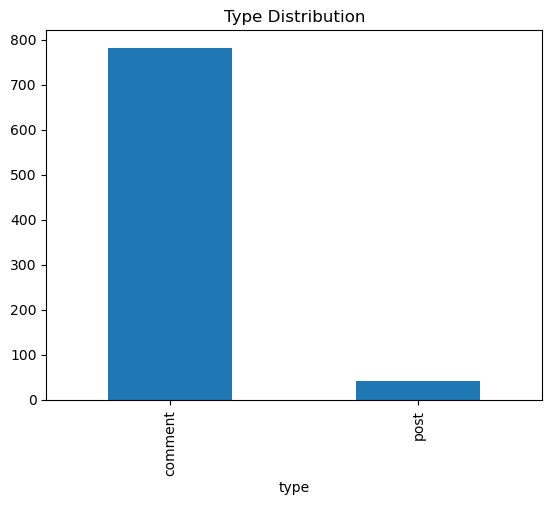

In [24]:
df.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

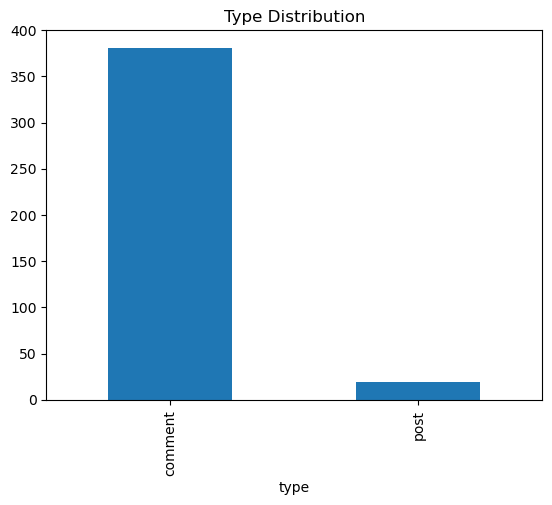

In [25]:
df_sample.type.value_counts().plot(kind='bar',
                            title='Type Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

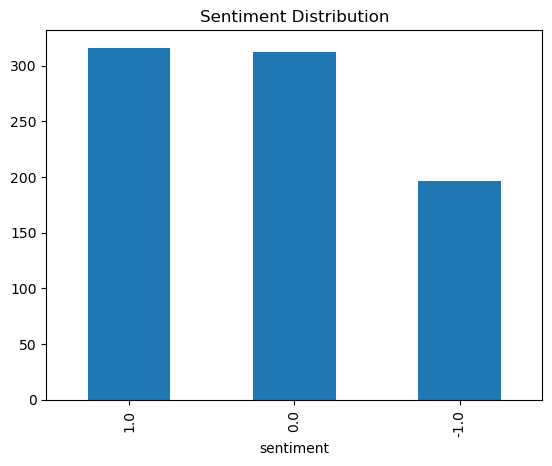

In [26]:
df.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

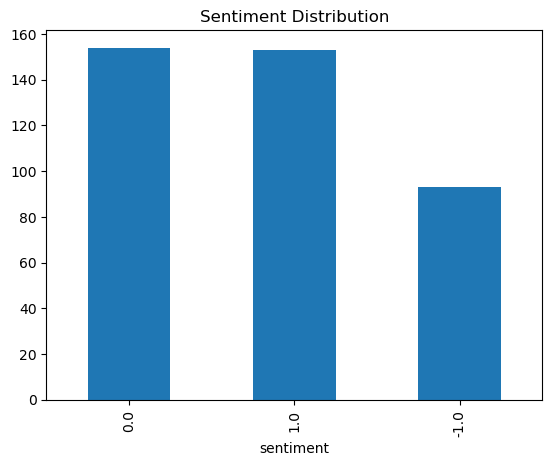

In [27]:
df_sample.sentiment.value_counts().plot(kind='bar',
                                title='Sentiment Distribution')

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

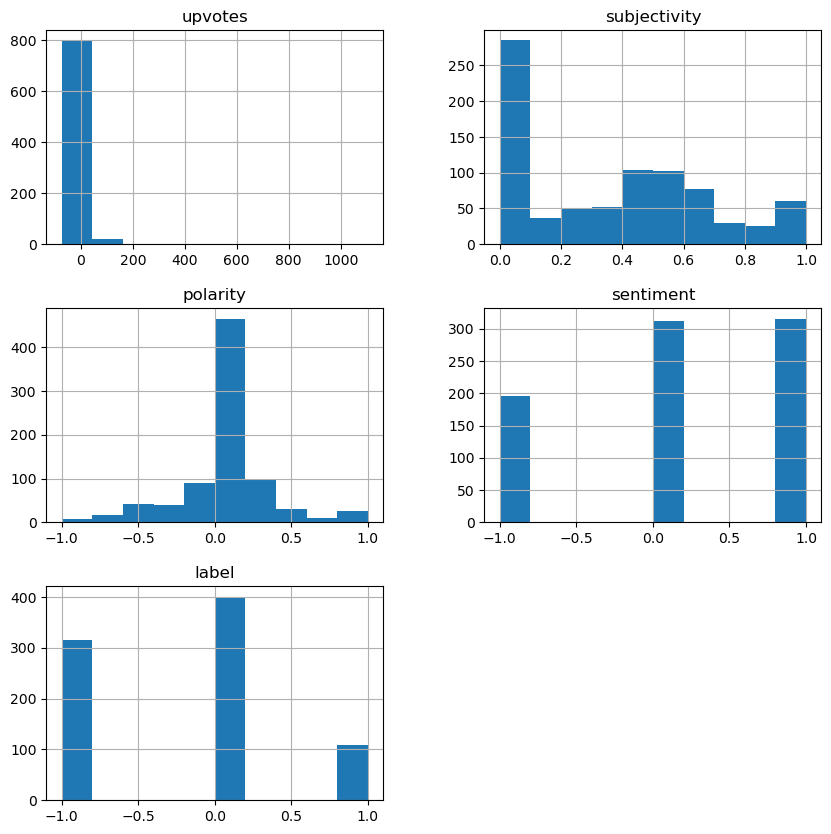

In [28]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'upvotes'}>,
        <Axes: title={'center': 'subjectivity'}>],
       [<Axes: title={'center': 'polarity'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

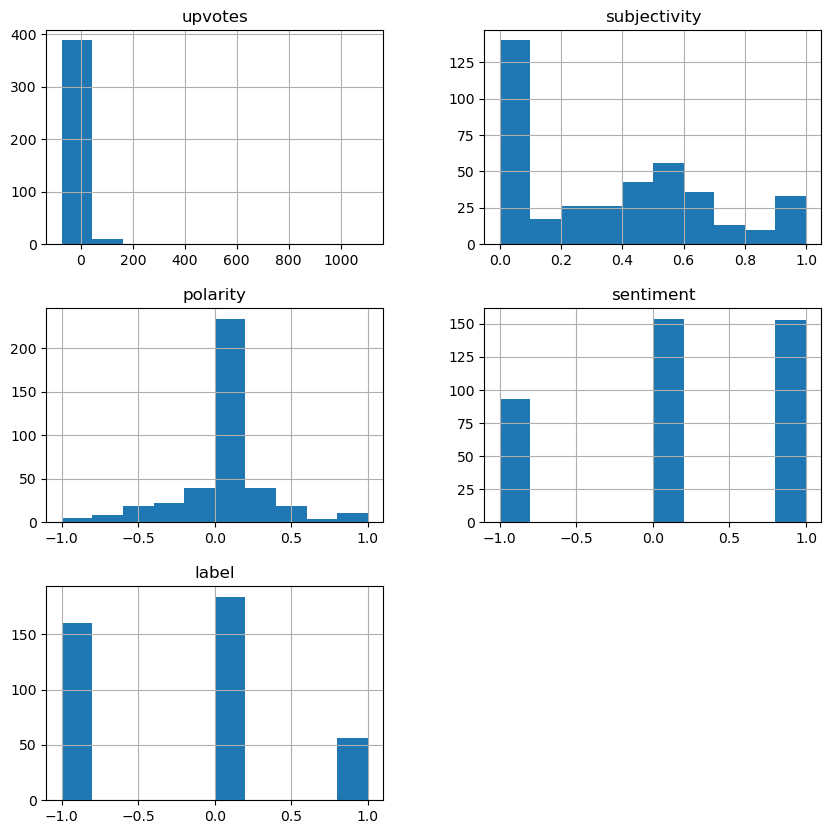

In [29]:
df_sample.hist(figsize=(10, 10))

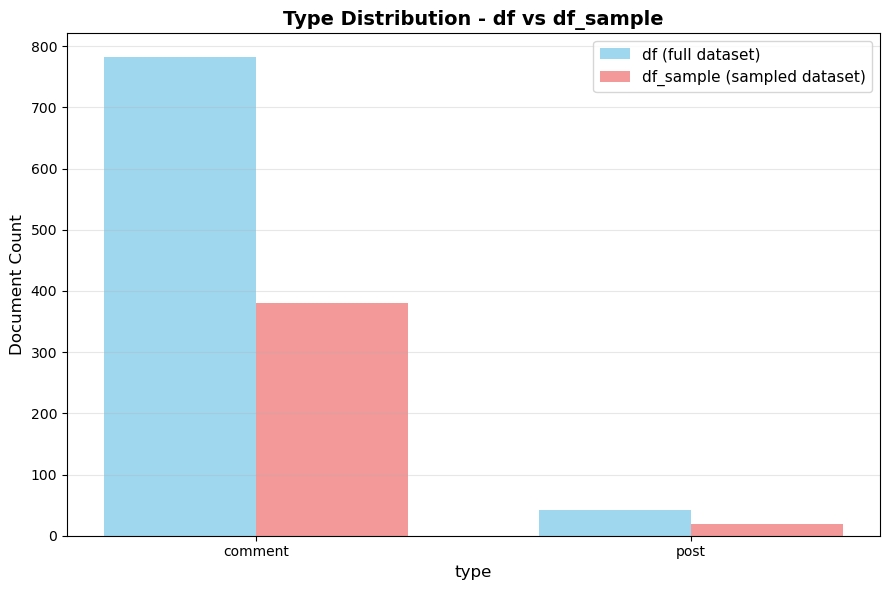

Type ÂàÜÂ∏ÉË©≥Á¥∞ÊØîËºÉ:
--------------------------------------------------
comment              | df:  782 | df_sample: 381 | ÊØî‰æã: 48.7%
post                 | df:   42 | df_sample:  19 | ÊØî‰æã: 45.2%


In [30]:
# Answer here
# Ê∫ñÂÇôË≥áÊñôÈÄ≤Ë°å‰∏¶ÊéíÊØîËºÉ
df_counts = df.type.value_counts()
df_sample_counts = df_sample.type.value_counts()

# Á¢∫‰øùÂÖ©ÂÄãË≥áÊñôÈõÜÊúâÁõ∏ÂêåÁöÑÈ°ûÂà•È†ÜÂ∫è
categories = df_counts.index
x_pos = np.arange(len(categories))

# Ë®≠ÂÆöÂúñË°®Â§ßÂ∞è
plt.figure(figsize=(9, 6))

# Ë®≠ÂÆöÈï∑Ê¢ùÂúñÁöÑÂØ¨Â∫¶
bar_width = 0.35

# Áπ™Ë£Ω‰∏¶ÊéíÈï∑Ê¢ùÂúñ
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# Ë®≠ÂÆöÂúñË°®Ê®ôÈ°åÂíåÊ®ôÁ±§
plt.title('Type Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('type', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# Ë®≠ÂÆö x Ëª∏Ê®ôÁ±§
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# Âä†ÂÖ•Âúñ‰æã
plt.legend(fontsize=11)

# Ë™øÊï¥ÁâàÈù¢
plt.tight_layout()

# È°ØÁ§∫Á∂≤Ê†º
plt.grid(axis='y', alpha=0.3)

# È°ØÁ§∫ÂúñË°®
plt.show()

# Âç∞Âá∫ÂÖ∑È´îÊï∏ÂÄºÊØîËºÉ
print("Type ÂàÜÂ∏ÉË©≥Á¥∞ÊØîËºÉ:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | ÊØî‰æã: {percentage:.1f}%")



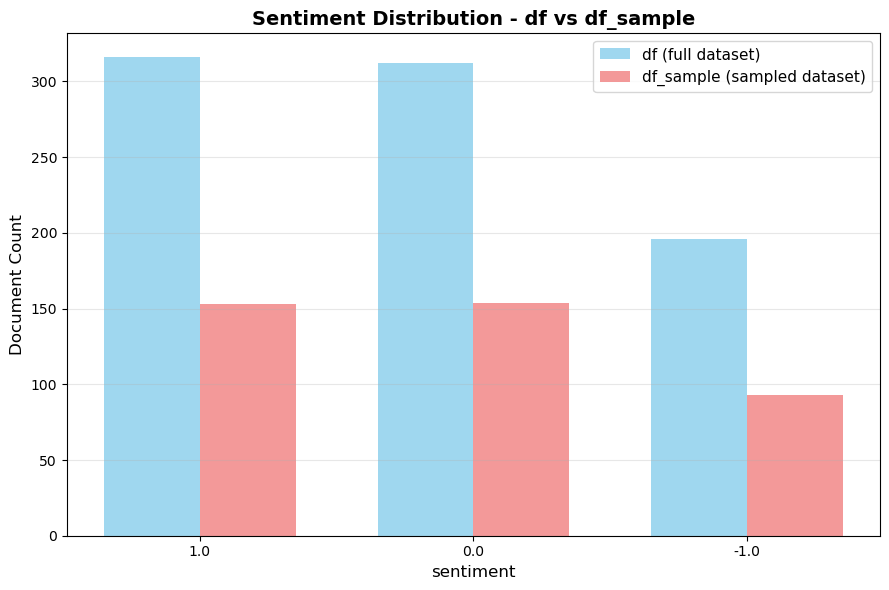

Sentiment ÂàÜÂ∏ÉË©≥Á¥∞ÊØîËºÉ:
--------------------------------------------------
                 1.0 | df:  316 | df_sample: 153 | ÊØî‰æã: 48.4%
                 0.0 | df:  312 | df_sample: 154 | ÊØî‰æã: 49.4%
                -1.0 | df:  196 | df_sample:  93 | ÊØî‰æã: 47.4%


In [31]:
# Answer here
# Ê∫ñÂÇôË≥áÊñôÈÄ≤Ë°å‰∏¶ÊéíÊØîËºÉ
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# Á¢∫‰øùÂÖ©ÂÄãË≥áÊñôÈõÜÊúâÁõ∏ÂêåÁöÑÈ°ûÂà•È†ÜÂ∫è
categories = df_counts.index
x_pos = np.arange(len(categories))

# Ë®≠ÂÆöÂúñË°®Â§ßÂ∞è
plt.figure(figsize=(9, 6))

# Ë®≠ÂÆöÈï∑Ê¢ùÂúñÁöÑÂØ¨Â∫¶
bar_width = 0.35

# Áπ™Ë£Ω‰∏¶ÊéíÈï∑Ê¢ùÂúñ
plt.bar(x_pos - bar_width/2, df_counts.values, bar_width, 
        label='df (full dataset)', alpha=0.8, color='skyblue')
plt.bar(x_pos + bar_width/2, [df_sample_counts.get(cat, 0) for cat in categories], 
        bar_width, label='df_sample (sampled dataset)', alpha=0.8, color='lightcoral')

# Ë®≠ÂÆöÂúñË°®Ê®ôÈ°åÂíåÊ®ôÁ±§
plt.title('Sentiment Distribution - df vs df_sample', fontsize=14, fontweight='bold')
plt.xlabel('sentiment', fontsize=12)
plt.ylabel('Document Count', fontsize=12)

# Ë®≠ÂÆö x Ëª∏Ê®ôÁ±§
plt.xticks(x_pos, categories, rotation=0, fontsize=10)

# Âä†ÂÖ•Âúñ‰æã
plt.legend(fontsize=11)

# Ë™øÊï¥ÁâàÈù¢
plt.tight_layout()

# È°ØÁ§∫Á∂≤Ê†º
plt.grid(axis='y', alpha=0.3)

# È°ØÁ§∫ÂúñË°®
plt.show()

# Âç∞Âá∫ÂÖ∑È´îÊï∏ÂÄºÊØîËºÉ
print("Sentiment ÂàÜÂ∏ÉË©≥Á¥∞ÊØîËºÉ:")
print("-" * 50)
for category in categories:
    df_count = df_counts[category]
    df_sample_count = df_sample_counts.get(category, 0)
    percentage = (df_sample_count / df_count) * 100 if df_count > 0 else 0
    print(f"{category:20} | df: {df_count:4d} | df_sample: {df_sample_count:3d} | ÊØî‰æã: {percentage:.1f}%")



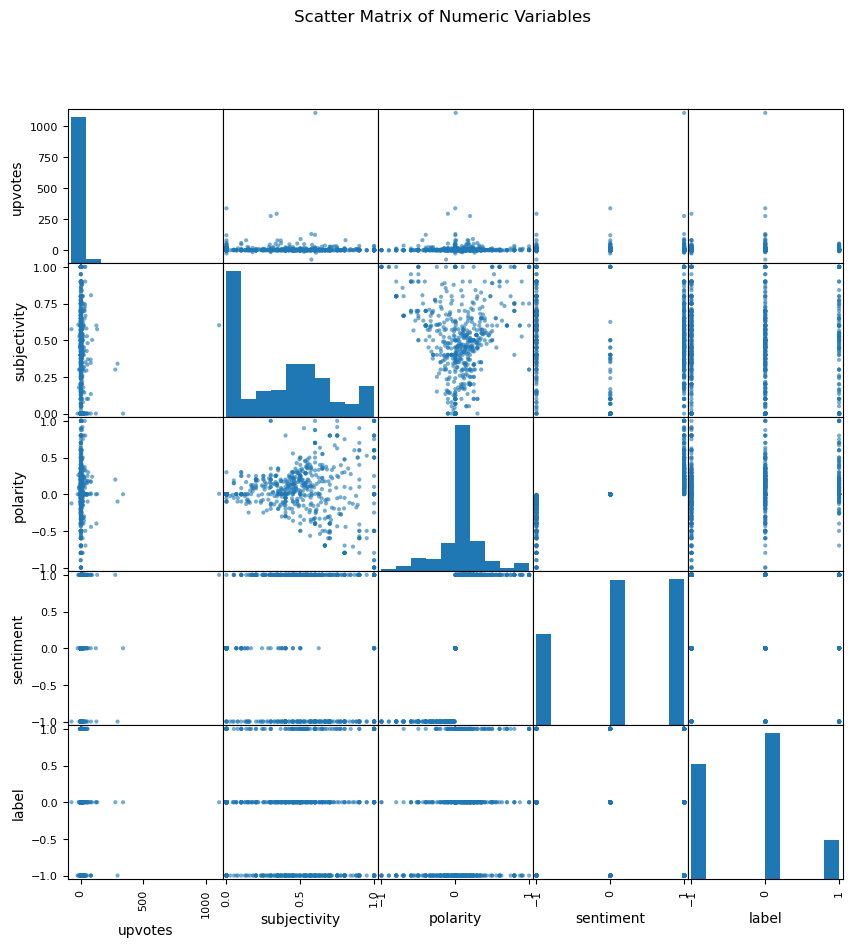

In [32]:
from pandas.plotting import scatter_matrix

# ÈÅ∏Êìá‰∏ªË¶ÅÊï∏ÂÄºÊ¨Ñ‰ΩçÂâµÂª∫Êï£ÈªûÂúñÁü©Èô£
selected_cols = ['upvotes', 'subjectivity', 'polarity', 'sentiment', 'label']
df_numeric = df[selected_cols]

scatter_matrix(df_numeric, figsize=(10, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix of Numeric Variables')
plt.show()

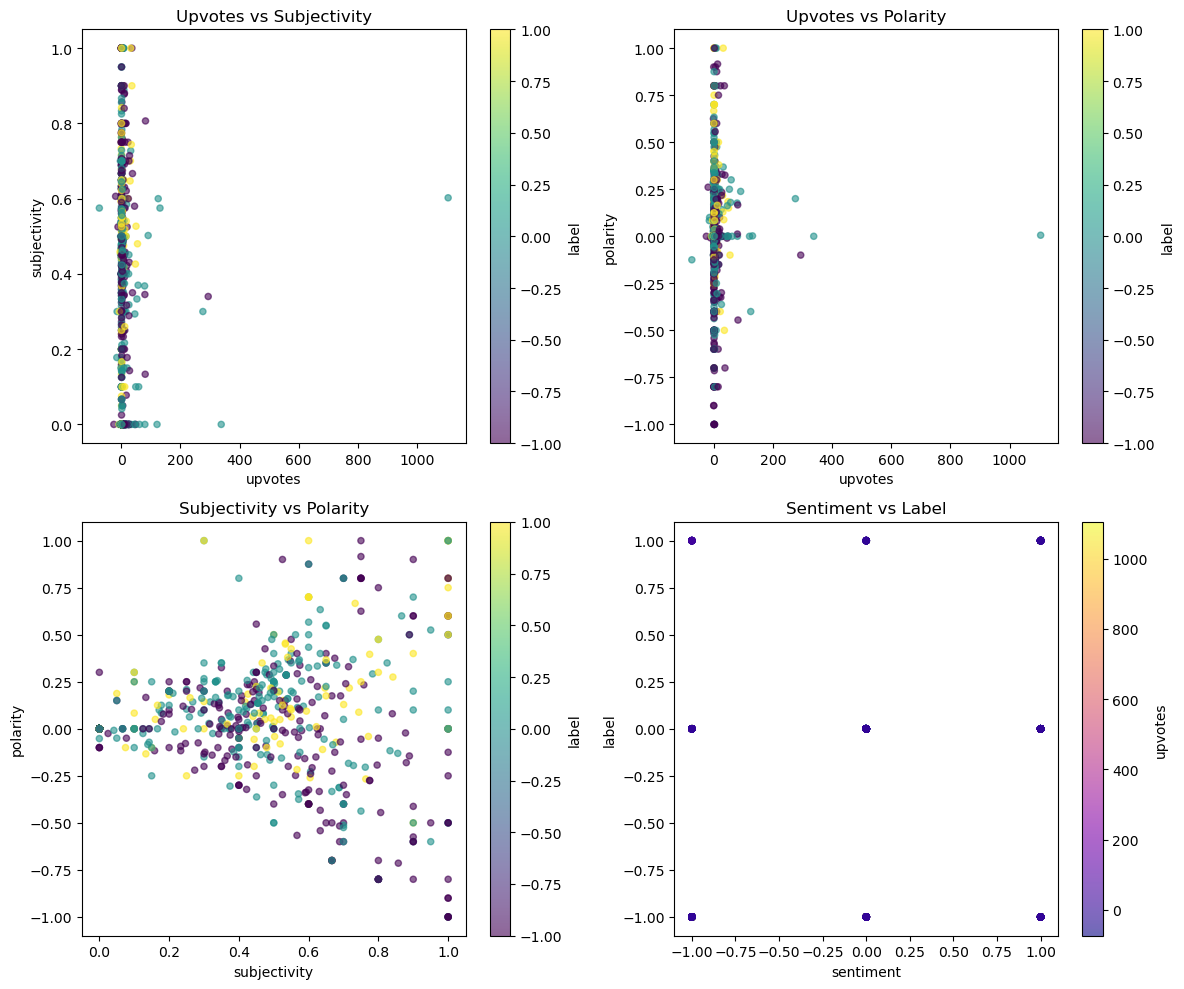

In [33]:
# ÂâµÂª∫Êï£ÈªûÂúñÁü©Èô£
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# upvotes vs subjectivity
df.plot.scatter(x='upvotes', y='subjectivity', c='label', colormap='viridis', 
                ax=axes[0,0], alpha=0.6)
axes[0,0].set_title('Upvotes vs Subjectivity')

# upvotes vs polarity
df.plot.scatter(x='upvotes', y='polarity', c='label', colormap='viridis', 
                ax=axes[0,1], alpha=0.6)
axes[0,1].set_title('Upvotes vs Polarity')

# subjectivity vs polarity
df.plot.scatter(x='subjectivity', y='polarity', c='label', colormap='viridis', 
                ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Subjectivity vs Polarity')

# sentiment vs label
df.plot.scatter(x='sentiment', y='label', c='upvotes', colormap='plasma', 
                ax=axes[1,1], alpha=0.6)
axes[1,1].set_title('Sentiment vs Label')

plt.tight_layout()
plt.show()

## Feature Creation

In [34]:
import nltk

# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [35]:
df['unigrams'].head()

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ‚Äô, t, say, thank, you, .]
Name: unigrams, dtype: object

In [36]:
df.head()

type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15   
2  https://apnews.com/article/trump-truth-social-...        1   
3  https://www.reddit.com/r/stockstobuytoday/comm...       30   
4  https://edition.cnn.com/2025/04/10/politics/tr...        1   

                                                text  subjectivity  polarity  \
0                                   Calls on retards      1.000000 -0.900000   
1  Stunt as in like why did they even make a big ...      0.177778  0.083333   
2                  Seeing lots of red in the ticker.      0.000000  0.000000   
3  Vision Marine Technologies Inc. is rewriting t...      0.646970  0.216383   
4                           He didn‚Äôt say thank you.      0.000000  0.000000   

   sentiment                                           entities  label  \
0       -1.0                                                 []   -1.0   
1        1.0              ['Stunt', 'company', 'deal', 'place']    0.0   
2        0.0                                         ['ticker']    0.0   
3        1.0  ['watercraft', 'skill', 'power', ']', 'feat', ...    1.0   
4        0.0                                                 []   -1.0   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...  
4               [He, didn, ‚Äô, t, say, thank, you, .]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [38]:
count_vect.get_feature_names_out()[887]

'company'

In [39]:
count_vect.get_feature_names_out()[132]

'50x'

In [40]:
analyze = count_vect.build_analyzer()
df.iloc[0]['text']
analyze(df.iloc[0]['text'])

['calls', 'on', 'retards']

In [41]:
df_counts.shape

(824, 4346)

In [42]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [43]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [44]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [45]:
count_vect.get_feature_names_out()[0:2]

array(['00', '000'], dtype=object)

In [46]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [47]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [48]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

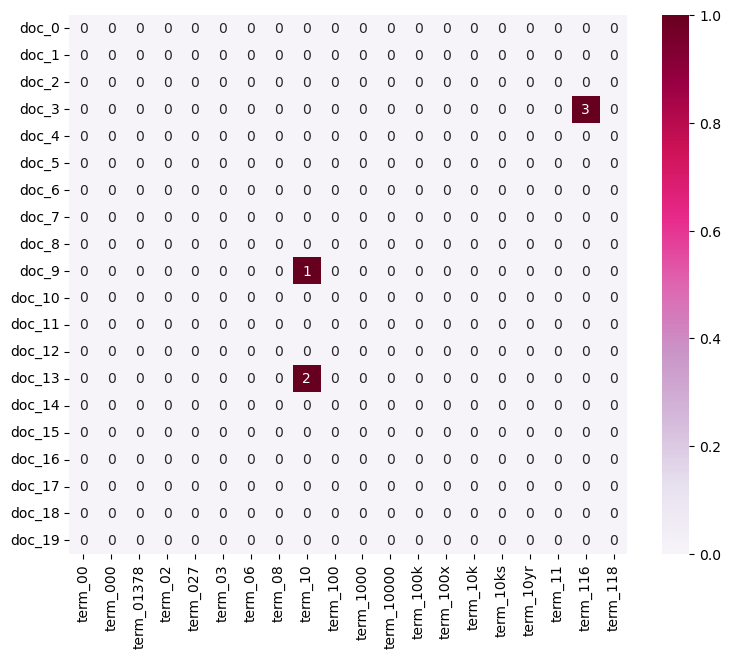

In [49]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Ë©ûÂΩôË°®Â§ßÂ∞è: 4346
ÊñáÊ™îÊï∏Èáè: 824


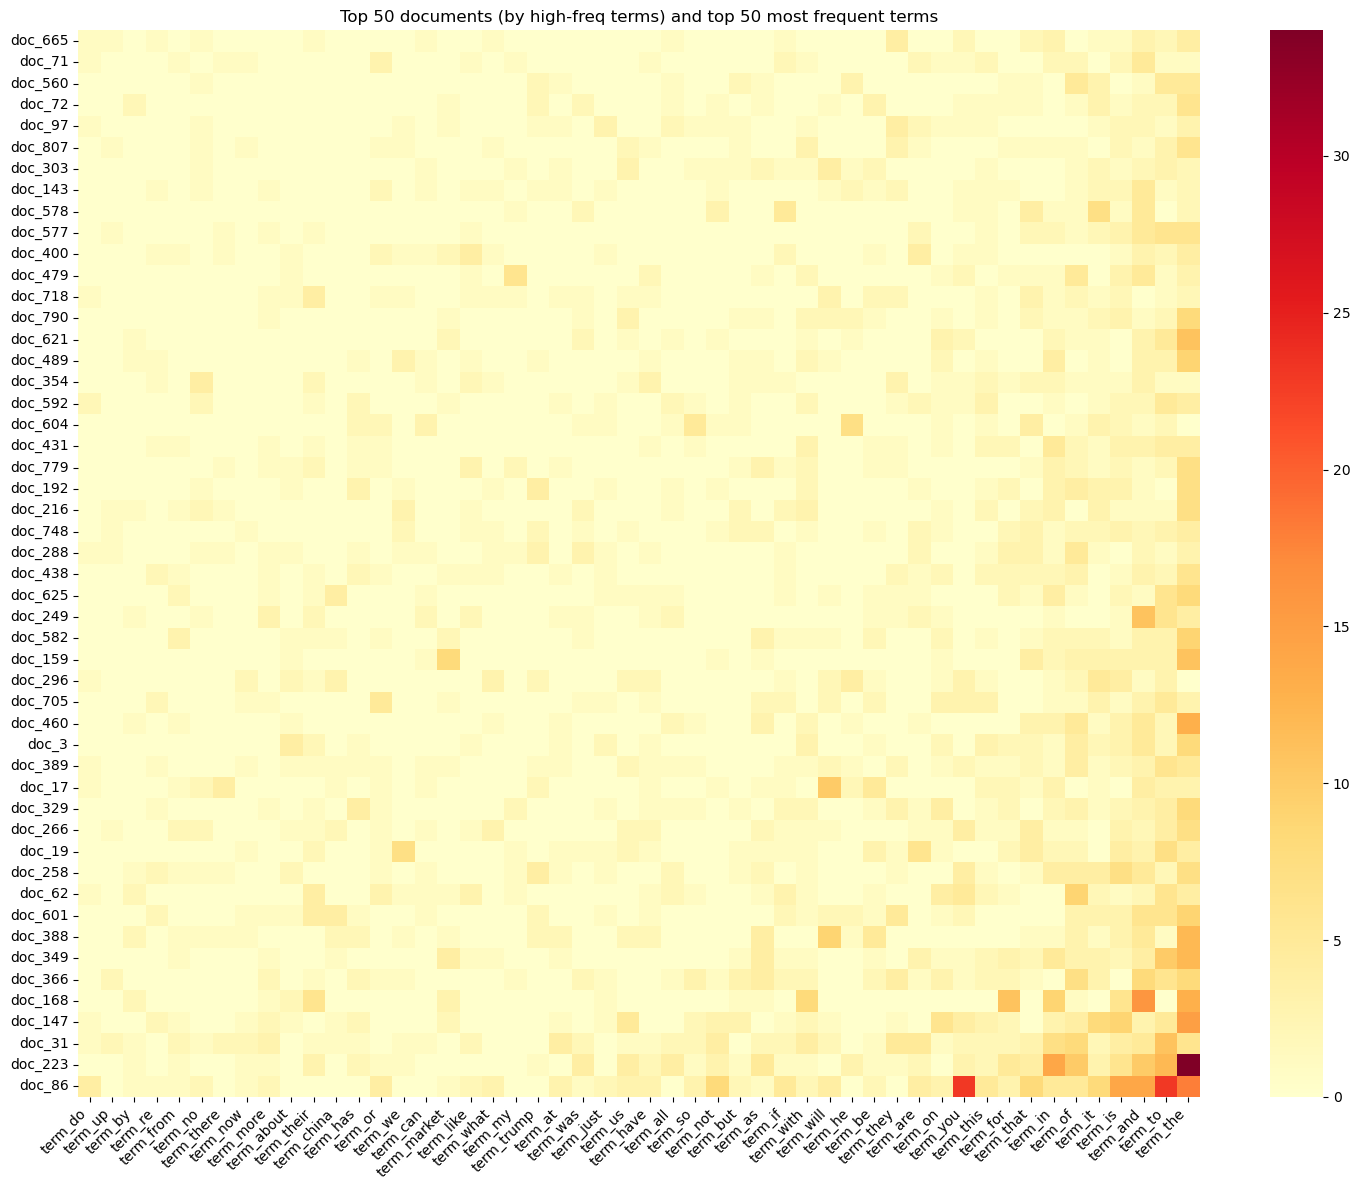

ÈÅ∏‰∏≠ÁöÑÊñáÊ™îÁ¥¢Âºï: [665  71 560  72  97 807 303 143 578 577 400 479 718 790 621 489 354 592
 604 431 779 192 216 748 288 438 625 249 582 159 296 705 460   3 389  17
 329 266  19 258  62 601 388 349 366 168 147  31 223  86]
ÈÅ∏‰∏≠ÁöÑË©ûÈ†ÖÁ¥¢Âºï: [1212 4071  680 3107 1639 2645 3854 2665 2544  175 3849  796 1837 2737
 4198  697 2424 2310 4224 2580 3977  406 4183 2197 4087 1842  289 3544
 2659  675  388 1987 4271 4255 1846  486 3858  374 2706 4333 3866 1604
 3846 2024 2687 2161 2149  327 3911 3848]

ÁÇ∫‰∫ÜÁç≤ÂæóÊúâÁî®‰∏îÁæéËßÄÁöÑË¶ñË¶∫ÂåñÊïàÊûúÔºåÊàë‰ΩøÁî®ÁöÑÊñπÊ≥ïÂåÖÊã¨Ôºö
1. ÈÅ∏ÊìáÊÄßÊäΩÊ®£ÔºöÈÅ∏ÂèñË©ûÈ†ªÊúÄÈ´òÁöÑ50ÂÄãË©ûÈ†ÖÂíåÂåÖÂê´ÈÄô‰∫õË©ûÈ†ÖÊúÄÂ§öÁöÑ50ÂÄãÊñáÊ™î
2. Êô∫ÊÖßÂûãÈÅéÊøæÔºöÈÅøÂÖçÈ°ØÁ§∫ÈÅéÊñºÁ®ÄÁñèÁöÑÂçÄÂüüÔºåÂ∞àÊ≥®ÊñºÊï∏ÊìöÂØÜÈõÜÁöÑÈÉ®ÂàÜ
3. ÈóúÈñâÊï∏ÂÄºÊ®ôË®ªÔºöÁï∂Áü©Èô£ËºÉÂ§ßÊôÇÈÅøÂÖçÊñáÂ≠óÈáçÁñä
4. ‰ΩøÁî®ÈÅ©ÂêàÁöÑËâ≤ÂΩ©Êò†Â∞ÑÔºöYlOrRdËâ≤ÂΩ©ÊñπÊ°àÂú®Ë°®Á§∫È†ªÁéáÊï∏ÊìöÊôÇÊõ¥ÁÇ∫Áõ¥ËßÄ
5. Ê∑ªÂä†ÈÅ©Áï∂ÁöÑÊ®ôÈ°åÔºöÊèêÈ´òÂúñË°®ÁöÑÂèØËÆÄÊÄß


In [50]:
# Answer here

# ÁÇ∫‰∫ÜÊúâÊïàÁéáÂú∞Ë¶ñË¶∫ÂåñÊï¥ÂÄãË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£ÔºåÊàëÊúÉ‰ΩøÁî®‰ª•‰∏ãÊñπÊ≥ïÔºö

# ÊâæÂá∫Ë©ûÈ†ªÊúÄÈ´òÁöÑ50ÂÄãË©ûÈ†ÖÔºå‰∏¶ÈÅ∏ÊìáÂåÖÂê´ÈÄô‰∫õË©ûÈ†ÖÊúÄÂ§öÁöÑ50ÂÄãÊñáÊ™î
print("Ë©ûÂΩôË°®Â§ßÂ∞è:", df_counts.shape[1])
print("ÊñáÊ™îÊï∏Èáè:", df_counts.shape[0])

# Ë®àÁÆóÊØèÂÄãË©ûÈ†ÖÁöÑÁ∏ΩÈ†ªÁéá
term_freq_sums = np.asarray(df_counts.sum(axis=0)).flatten()

# ÈÅ∏ÊìáÂá∫ÁèæÈ†ªÁéáÊúÄÈ´òÁöÑÂâç50ÂÄãË©ûÈ†Ö
top_terms_idx = np.argsort(term_freq_sums)[-50:]
top_term_names = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_terms_idx]]

# Ë®àÁÆóÊØèÂÄãÊñáÊ™î‰∏≠ÈÄô50ÂÄãÈ´òÈ†ªË©ûÈ†ÖÁöÑÁ∏ΩÂá∫ÁèæÊ¨°Êï∏
top_terms_matrix = df_counts[:, top_terms_idx]
doc_scores = np.array(top_terms_matrix.sum(axis=1)).flatten()

# ÈÅ∏ÊìáÂåÖÂê´ÈÄô‰∫õÈ´òÈ†ªË©ûÈ†ÖÊúÄÂ§öÁöÑÂâç50ÂÄãÊñáÊ™î
top_docs_idx = np.argsort(doc_scores)[-50:]
top_doc_names = ["doc_"+ str(i) for i in top_docs_idx]

# ÊèêÂèñÂ∞çÊáâÁöÑÂ≠êÁü©Èô£ - ÂåÖÂê´È´òÈ†ªË©ûÈ†ÖÊúÄÂ§öÁöÑ50ÂÄãÊñáÊ™î √ó Ë©ûÈ†ªÊúÄÈ´òÁöÑ50ÂÄãË©ûÈ†Ö
plot_z_large = df_counts[top_docs_idx, :][:, top_terms_idx].toarray()

# ÂâµÂª∫Êõ¥Â§ßÁöÑÁÜ±ÂäõÂúñ
plt.figure(figsize=(15, 12))
df_large = pd.DataFrame(plot_z_large, columns=top_term_names, index=top_doc_names)
ax = sns.heatmap(df_large, 
                 cmap="YlOrRd", 
                 vmin=0, 
                 vmax=np.max(plot_z_large),
                 annot=False,  # ÈóúÈñâÊï∏ÂÄºÊ®ôË®ª‰ª•ÈÅøÂÖçÈÅéÂ∫¶ÊìÅÊì†
                 cbar=True)
plt.title("Top 50 documents (by high-freq terms) and top 50 most frequent terms")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"ÈÅ∏‰∏≠ÁöÑÊñáÊ™îÁ¥¢Âºï: {top_docs_idx}")
print(f"ÈÅ∏‰∏≠ÁöÑË©ûÈ†ÖÁ¥¢Âºï: {top_terms_idx}")

print("\nÁÇ∫‰∫ÜÁç≤ÂæóÊúâÁî®‰∏îÁæéËßÄÁöÑË¶ñË¶∫ÂåñÊïàÊûúÔºåÊàë‰ΩøÁî®ÁöÑÊñπÊ≥ïÂåÖÊã¨Ôºö")
print("1. ÈÅ∏ÊìáÊÄßÊäΩÊ®£ÔºöÈÅ∏ÂèñË©ûÈ†ªÊúÄÈ´òÁöÑ50ÂÄãË©ûÈ†ÖÂíåÂåÖÂê´ÈÄô‰∫õË©ûÈ†ÖÊúÄÂ§öÁöÑ50ÂÄãÊñáÊ™î")
print("2. Êô∫ÊÖßÂûãÈÅéÊøæÔºöÈÅøÂÖçÈ°ØÁ§∫ÈÅéÊñºÁ®ÄÁñèÁöÑÂçÄÂüüÔºåÂ∞àÊ≥®ÊñºÊï∏ÊìöÂØÜÈõÜÁöÑÈÉ®ÂàÜ")
print("3. ÈóúÈñâÊï∏ÂÄºÊ®ôË®ªÔºöÁï∂Áü©Èô£ËºÉÂ§ßÊôÇÈÅøÂÖçÊñáÂ≠óÈáçÁñä")
print("4. ‰ΩøÁî®ÈÅ©ÂêàÁöÑËâ≤ÂΩ©Êò†Â∞ÑÔºöYlOrRdËâ≤ÂΩ©ÊñπÊ°àÂú®Ë°®Á§∫È†ªÁéáÊï∏ÊìöÊôÇÊõ¥ÁÇ∫Áõ¥ËßÄ")
print("5. Ê∑ªÂä†ÈÅ©Áï∂ÁöÑÊ®ôÈ°åÔºöÊèêÈ´òÂúñË°®ÁöÑÂèØËÆÄÊÄß")



### Transform Text Data


In [51]:
term_frequencies = np.asarray(df_counts.sum(axis=0)).flatten()

term_frequencies

array([4, 6, 1, ..., 1, 1, 1])

/var/folders/8s/k12w27jj58jgfxwpf_vwzv300000gn/T/ipykernel_72491/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


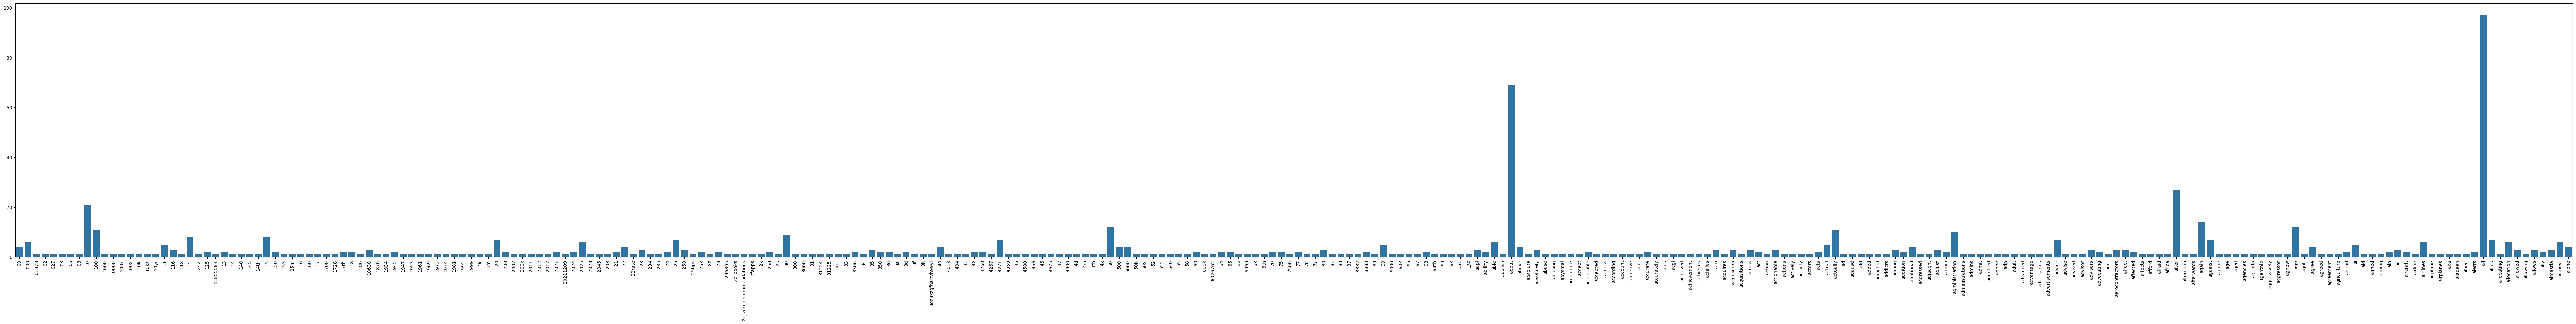

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [53]:
import plotly.express as px
import plotly.graph_objects as go

# Ê∫ñÂÇôË≥áÊñô‰æõplotly‰ΩøÁî®
df_terms = pd.DataFrame({
    'terms': count_vect.get_feature_names_out()[:300],
    'frequency': term_frequencies[:300]
})

# Âª∫Á´ã‰∫íÂãïÂºèÈï∑Ê¢ùÂúñ
fig = px.bar(df_terms, 
             x='terms', 
             y='frequency',
             title='Ë©ûÂΩôÈ†ªÁéá‰∫íÂãïÂºèË¶ñË¶∫Âåñ (Ââç300ÂÄãË©ûÂΩô)',
             labels={'terms': 'Ë©ûÂΩô', 'frequency': 'È†ªÁéá'},
             hover_data={'frequency': True})

# Ë™øÊï¥ÂúñË°®Ê®£Âºè
fig.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

# È°ØÁ§∫ÂúñË°®
fig.show()


In [54]:
# Answer here
# Âè™È°ØÁ§∫Ââç200ÂÄãÊúÄÈ´òÈ†ªÁéáÁöÑË©ûÂΩô
top_200_indices = np.argsort(term_frequencies)[-200:][::-1]
top_200_terms = count_vect.get_feature_names_out()[top_200_indices]
top_200_values = term_frequencies[top_200_indices]

# Ê∫ñÂÇôÂâç200È´òÈ†ªË©ûÂΩôË≥áÊñô
df_top_200 = pd.DataFrame({
    'terms': top_200_terms,
    'frequency': top_200_values
})

print(f"È°ØÁ§∫Ââç200ÂÄãÊúÄÈ´òÈ†ªÁéáÁöÑË©ûÂΩô")

# Âª∫Á´ãÂâç200È´òÈ†ªË©ûÂΩôË¶ñË¶∫Âåñ
fig_top_200 = px.bar(df_top_200, 
                     x='terms', 
                     y='frequency',
                     title='Ââç200ÂÄãÊúÄÈ´òÈ†ªÁéáË©ûÂΩôË¶ñË¶∫Âåñ',
                     labels={'terms': 'Ë©ûÂΩô', 'frequency': 'È†ªÁéá'},
                     hover_data={'frequency': True})

fig_top_200.update_layout(
    width=1000,
    height=500,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_top_200.show()


È°ØÁ§∫Ââç200ÂÄãÊúÄÈ´òÈ†ªÁéáÁöÑË©ûÂΩô


In [55]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/8s/k12w27jj58jgfxwpf_vwzv300000gn/T/ipykernel_72491/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



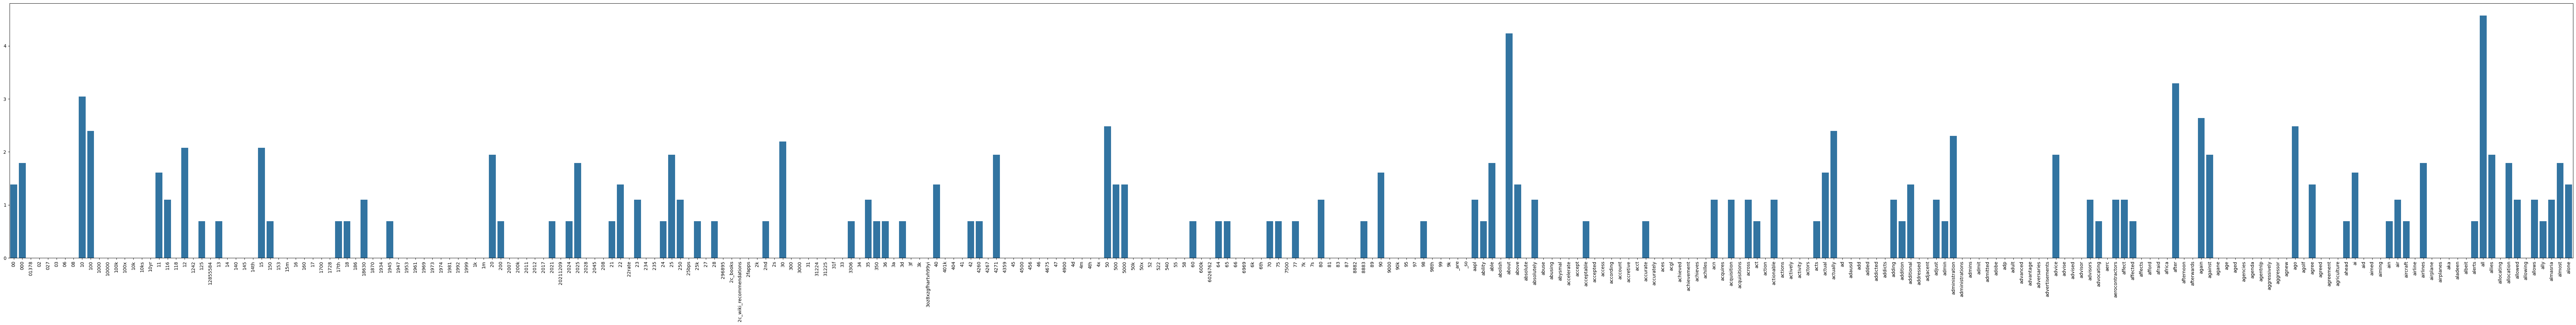

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [57]:
# ÂâµÂª∫ÂåÖÂê´Ë©ûÂΩô„ÄÅÂ∞çÊï∏È†ªÁéáÂíåÊéíÂêçÁöÑDataFrame
terms_log_data = []
for i, term in enumerate(count_vect.get_feature_names_out()):
    terms_log_data.append({
        'terms': term,
        'log_frequency': term_frequencies_log[i],
        'rank': i + 1
    })

df_terms_log = pd.DataFrame(terms_log_data)

# Ê†πÊìöÂ∞çÊï∏È†ªÁéáÊéíÂ∫èÔºàÁî±È´òÂà∞‰ΩéÔºâ
df_sorted_log = df_terms_log.sort_values('log_frequency', ascending=False).reset_index(drop=True)
df_sorted_log['rank'] = range(1, len(df_sorted_log) + 1)

# ÂèñÂâç300ÂÄãË©ûÂΩôÈÄ≤Ë°åË¶ñË¶∫Âåñ
df_sorted_log_top300 = df_sorted_log.head(300)

# Ê†πÊìöÂ∞çÊï∏È†ªÁéáÊéíÂ∫èË©ûÂΩôÔºàÁî±È´òÂà∞‰ΩéÔºâ
fig_terms_sorted_log = px.bar(df_sorted_log_top300, 
                              x='terms', 
                              y='log_frequency',
                              title='Ë©ûÂΩôÂ∞çÊï∏È†ªÁéáË¶ñË¶∫Âåñ - ÊåâÂ∞çÊï∏È†ªÁéáÊéíÂ∫è (Ââç300ÂÄãË©ûÂΩô)',
                              labels={'terms': 'Ë©ûÂΩô', 'log_frequency': 'Ë©ûÂΩôÂ∞çÊï∏È†ªÁéá'},
                              hover_data={'log_frequency': True, 'rank': True})

fig_terms_sorted_log.update_layout(
    width=1200,
    height=600,
    xaxis_tickangle=-90,
    showlegend=False
)

fig_terms_sorted_log.show()

# Â∞çÊï∏ÂàÜ‰ΩàÁöÑÁµ±Ë®àÂàÜÊûê
top_300_log_frequencies = df_sorted_log_top300['log_frequency'].values
top_300_log_terms = df_sorted_log_top300['terms'].values

# Ë®àÁÆóÂâç10%ÂíåÂæå10%Ë©ûÂΩôÁöÑÂπ≥ÂùáÂ∞çÊï∏È†ªÁéá
top_10_percent_count_log = int(300 * 0.1)
top_10_percent_avg_log = np.mean(top_300_log_frequencies[:top_10_percent_count_log])
bottom_10_percent_avg_log = np.mean(top_300_log_frequencies[-top_10_percent_count_log:])

print(f"\nÂ∞çÊï∏È†ªÁéáÈï∑Â∞æÊïàÊáâÂàÜÊûê:")
print(f"Ââç10%Ë©ûÂΩôÁöÑÂπ≥ÂùáÂ∞çÊï∏È†ªÁéá: {top_10_percent_avg_log:.2f}")
print(f"Âæå10%Ë©ûÂΩôÁöÑÂπ≥ÂùáÂ∞çÊï∏È†ªÁéá: {bottom_10_percent_avg_log:.2f}")
print(f"Â∞çÊï∏È†ªÁéáÂ∑ÆÁï∞: {top_10_percent_avg_log - bottom_10_percent_avg_log:.2f}")
print(f"ÊúÄÈ´òÂ∞çÊï∏È†ªÁéáË©ûÂΩô: '{top_300_log_terms[0]}' (Â∞çÊï∏È†ªÁéá: {top_300_log_frequencies[0]:.2f})")
print(f"Á¨¨300È´òÂ∞çÊï∏È†ªÁéáË©ûÂΩô: '{top_300_log_terms[299]}' (Â∞çÊï∏È†ªÁéá: {top_300_log_frequencies[299]:.2f})")

# ËßÄÂØüÂà∞ÁöÑÂ∑ÆÁï∞ÂíåÊ¥ûÂØüÔºö
print("\n=== Â∞çÊï∏ÂàÜ‰ΩàËàáÂéüÂßãÈ†ªÁéáÂàÜ‰ΩàÁöÑÂ∑ÆÁï∞ÂàÜÊûê ===")
print("1. Ë¶ñË¶∫ÂåñÂ∑ÆÁï∞:")
print("   - Â∞çÊï∏ËΩâÊèõÂæåÔºåÈ´òÈ†ªÁéáÂíå‰ΩéÈ†ªÁéáË©ûÂΩô‰πãÈñìÁöÑÂ∑ÆË∑ùË¢´Â£ìÁ∏Æ")
print("   - ÂéüÊú¨Ê•µÁ´ØÁöÑÈï∑Â∞æÂàÜ‰ΩàËÆäÂæóÊõ¥Âä†Âπ≥ÊªëÂíåÊòìÊñºËßÄÂØü")
print("   - yËª∏ÁöÑÂ∞∫Â∫¶ÂæûÊï∏ÂçÉÁ¥öÂà•ËÆäÁÇ∫ÂÄã‰ΩçÊï∏Á¥öÂà•")

print("\n2. ÂàÜ‰ΩàÁâπÊÄß:")
print("   - ÂéüÂßãÈ†ªÁéáÂëàÁèæÂÖ∏ÂûãÁöÑÂÜ™ÂæãÂàÜ‰ΩàÔºàPower LawÔºâ")
print("   - Â∞çÊï∏ËΩâÊèõÂæåÂëàÁèæÊõ¥Êé•ËøëÁ∑öÊÄßÁöÑÈÅûÊ∏õË∂®Âã¢")
print("   - ÊúâÂä©ÊñºË≠òÂà•‰∏≠Á≠âÈ†ªÁéáË©ûÂΩôÁöÑÈáçË¶ÅÊÄß")

print("\n3. ÂØ¶ÈöõÊ¥ûÂØü:")
print("   - Â∞çÊï∏ÂàÜ‰ΩàÊúâÂä©ÊñºÂπ≥Ë°°È´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩôÁöÑÈáçË¶ÅÊÄß")
print("   - Âú®‰ø°ÊÅØÊ™¢Á¥¢‰∏≠ÔºåTF-IDFÁ≠âÁÆóÊ≥ïÂ∞±‰ΩøÁî®‰∫ÜÂ∞çÊï∏ËΩâÊèõ")
print("   - Â∞çÊï∏ËΩâÊèõÂèØ‰ª•Ê∏õÂ∞ëÊ•µÈ´òÈ†ªË©ûÂΩôÔºàÂ¶ÇÂÅúÁî®Ë©ûÔºâÁöÑ‰∏ªÂ∞éÊïàÊáâ")
print("   - Êõ¥ÂÆπÊòìË≠òÂà•ÂÖ∑Êúâ‰∏≠Á≠âÈáçË¶ÅÊÄß‰ΩÜË¢´È´òÈ†ªË©ûÂΩôÊé©ËìãÁöÑË©ûÂΩô")

print("\n4. ÊáâÁî®Â†¥ÊôØ:")
print("   - ÊñáÊú¨ÂàÜÊûêÔºöÂπ≥Ë°°Ë©ûÂΩôÈáçË¶ÅÊÄßÔºåÈÅøÂÖçÈ´òÈ†ªË©û‰∏ªÂ∞é")
print("   - ÁâπÂæµÂ∑•Á®ãÔºöÂ∞çÊï∏ËΩâÊèõÂ∏∏Áî®ÊñºËôïÁêÜÂÅèÊÖãÂàÜ‰ΩàÁöÑÁâπÂæµ")
print("   - Ë≥áÊñôË¶ñË¶∫ÂåñÔºö‰ΩøÊ•µÁ´ØÂÄºÁöÑÂΩ±ÈüøÈôç‰ΩéÔºåÊõ¥ÊòìÊñºËßÄÂØüÊï¥È´îÊ®°Âºè")





Â∞çÊï∏È†ªÁéáÈï∑Â∞æÊïàÊáâÂàÜÊûê:
Ââç10%Ë©ûÂΩôÁöÑÂπ≥ÂùáÂ∞çÊï∏È†ªÁéá: 5.12
Âæå10%Ë©ûÂΩôÁöÑÂπ≥ÂùáÂ∞çÊï∏È†ªÁéá: 2.33
Â∞çÊï∏È†ªÁéáÂ∑ÆÁï∞: 2.80
ÊúÄÈ´òÂ∞çÊï∏È†ªÁéáË©ûÂΩô: 'the' (Â∞çÊï∏È†ªÁéá: 6.79)
Á¨¨300È´òÂ∞çÊï∏È†ªÁéáË©ûÂΩô: 'place' (Â∞çÊï∏È†ªÁéá: 2.30)

=== Â∞çÊï∏ÂàÜ‰ΩàËàáÂéüÂßãÈ†ªÁéáÂàÜ‰ΩàÁöÑÂ∑ÆÁï∞ÂàÜÊûê ===
1. Ë¶ñË¶∫ÂåñÂ∑ÆÁï∞:
   - Â∞çÊï∏ËΩâÊèõÂæåÔºåÈ´òÈ†ªÁéáÂíå‰ΩéÈ†ªÁéáË©ûÂΩô‰πãÈñìÁöÑÂ∑ÆË∑ùË¢´Â£ìÁ∏Æ
   - ÂéüÊú¨Ê•µÁ´ØÁöÑÈï∑Â∞æÂàÜ‰ΩàËÆäÂæóÊõ¥Âä†Âπ≥ÊªëÂíåÊòìÊñºËßÄÂØü
   - yËª∏ÁöÑÂ∞∫Â∫¶ÂæûÊï∏ÂçÉÁ¥öÂà•ËÆäÁÇ∫ÂÄã‰ΩçÊï∏Á¥öÂà•

2. ÂàÜ‰ΩàÁâπÊÄß:
   - ÂéüÂßãÈ†ªÁéáÂëàÁèæÂÖ∏ÂûãÁöÑÂÜ™ÂæãÂàÜ‰ΩàÔºàPower LawÔºâ
   - Â∞çÊï∏ËΩâÊèõÂæåÂëàÁèæÊõ¥Êé•ËøëÁ∑öÊÄßÁöÑÈÅûÊ∏õË∂®Âã¢
   - ÊúâÂä©ÊñºË≠òÂà•‰∏≠Á≠âÈ†ªÁéáË©ûÂΩôÁöÑÈáçË¶ÅÊÄß

3. ÂØ¶ÈöõÊ¥ûÂØü:
   - Â∞çÊï∏ÂàÜ‰ΩàÊúâÂä©ÊñºÂπ≥Ë°°È´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩôÁöÑÈáçË¶ÅÊÄß
   - Âú®‰ø°ÊÅØÊ™¢Á¥¢‰∏≠ÔºåTF-IDFÁ≠âÁÆóÊ≥ïÂ∞±‰ΩøÁî®‰∫ÜÂ∞çÊï∏ËΩâÊèõ
   - Â∞çÊï∏ËΩâÊèõÂèØ‰ª•Ê∏õÂ∞ëÊ•µÈ´òÈ†ªË©ûÂΩôÔºàÂ¶ÇÂÅúÁî®Ë©ûÔºâÁöÑ‰∏ªÂ∞éÊïàÊáâ
   - Êõ¥ÂÆπÊòìË≠òÂà•ÂÖ∑Êúâ‰∏≠Á≠âÈáçË¶ÅÊÄß‰ΩÜË¢´È´òÈ†ªË©ûÂΩôÊé©Ë

# Phase 2

In [58]:
## Phase 2: Finding Frequent Patterns, Classification, and TF-IDF

### 5.4 Finding Frequent Patterns

È¶ñÂÖàÔºåÊàëÂÄëÈúÄË¶ÅÂª∫Á´ãË©ûÈ†Ö-ÊñáÊ™îÈ†ªÁéáÁü©Èô£Ôºàterm-document frequency matrixÔºâ„ÄÇÈÄôÂÄãÁü©Èô£ÊúÉÂ∞áÊØèÂÄãÊñáÊ™îË°®Á§∫ÁÇ∫Ë©ûÂΩôÁöÑÈ†ªÁéáÂêëÈáè„ÄÇ


In [59]:
# Âª∫Á´ãË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£
# ‰ΩøÁî® df_sample Ë≥áÊñôÈõÜÔºå‰∏¶Â∞á sentiment ‰ΩúÁÇ∫È°ûÂà•
# Â∞á sentiment ËΩâÊèõÁÇ∫Â≠ó‰∏≤È°ûÂà•ÂêçÁ®±
df_sample['category_name'] = df_sample['sentiment'].map({
    1.0: 'positive',
    0.0: 'neutral',
    -1.0: 'negative'
})

# Ê∫ñÂÇôË≥áÊñô
X = df_sample[['text', 'sentiment', 'category_name']].copy()
X['category'] = X['sentiment'].map({1.0: 0, 0.0: 1, -1.0: 2})  # Êï∏ÂÄºÁ∑®Á¢º

print(f"Ë≥áÊñôÈõÜÂ§ßÂ∞è: {len(X)}")
print(f"\nÈ°ûÂà•ÂàÜÂ∏É:")
print(X['category_name'].value_counts())


Ë≥áÊñôÈõÜÂ§ßÂ∞è: 400

È°ûÂà•ÂàÜÂ∏É:
category_name
neutral     154
positive    153
negative     93
Name: count, dtype: int64


In [60]:
# ÁÇ∫ÊØèÂÄãÈ°ûÂà•Âª∫Á´ãË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£
from sklearn.feature_extraction.text import CountVectorizer

categories = X['category_name'].unique()
print(f"È°ûÂà•: {categories}\n")

# ÁÇ∫ÊØèÂÄãÈ°ûÂà•ÂâµÂª∫Ë©ûÈ†Ö-ÊñáÊ™îÁü©Èô£
term_document_dfs = {}

for category in categories:
    # ÂèñÂæóË©≤È°ûÂà•ÁöÑÊâÄÊúâÊñáÊú¨
    category_texts = X[X['category_name'] == category]['text']
    
    # ‰ΩøÁî® CountVectorizer Âª∫Á´ãË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£
    count_vect_cat = CountVectorizer()
    X_counts_cat = count_vect_cat.fit_transform(category_texts)
    
    # ËΩâÊèõÁÇ∫ DataFrame
    term_document_df = pd.DataFrame(
        X_counts_cat.toarray(),
        columns=count_vect_cat.get_feature_names_out(),
        index=category_texts.index
    )
    
    term_document_dfs[category] = term_document_df
    
    print(f"{category} È°ûÂà•:")
    print(f"  - ÊñáÊ™îÊï∏Èáè: {term_document_df.shape[0]}")
    print(f"  - Ë©ûÂΩôÊï∏Èáè: {term_document_df.shape[1]}")
    print()


È°ûÂà•: ['neutral' 'positive' 'negative']

neutral È°ûÂà•:
  - ÊñáÊ™îÊï∏Èáè: 154
  - Ë©ûÂΩôÊï∏Èáè: 750

positive È°ûÂà•:
  - ÊñáÊ™îÊï∏Èáè: 153
  - Ë©ûÂΩôÊï∏Èáè: 1908

negative È°ûÂà•:
  - ÊñáÊ™îÊï∏Èáè: 93
  - Ë©ûÂΩôÊï∏Èáè: 969



#### ÈÅéÊøæÈ´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩô

Ê†πÊìö Master ÁöÑÊñπÊ≥ïÔºåÊàëÂÄëÈúÄË¶ÅÈÅéÊøæÊéâÈ†ªÁéáÈÅéÈ´òÔºàÂÅúÁî®Ë©ûÔºâÂíåÈÅé‰ΩéÔºàÈõúË®äÔºâÁöÑË©ûÂΩô„ÄÇ


In [61]:
# ÈÅéÊøæÈ´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩôÁöÑÂáΩÊï∏
def filter_top_bottom_words_by_sum(term_document_df, bottom_percent=0.01, top_percent=0.05):
    """
    ÈÅéÊøæË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£‰∏≠ÁöÑÈ´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩô
    
    ÂèÉÊï∏:
    - term_document_df: Ë©ûÈ†Ö-ÊñáÊ™îÈ†ªÁéáÁü©Èô£
    - bottom_percent: Ë¶ÅÈÅéÊøæÁöÑ‰ΩéÈ†ªË©ûÂΩôÁôæÂàÜÊØîÔºàÈ†êË®≠ 1%Ôºâ
    - top_percent: Ë¶ÅÈÅéÊøæÁöÑÈ´òÈ†ªË©ûÂΩôÁôæÂàÜÊØîÔºàÈ†êË®≠ 5%Ôºâ
    """
    # Ë®àÁÆóÊØèÂÄãË©ûÂΩôÂú®ÊâÄÊúâÊñáÊ™î‰∏≠ÁöÑÁ∏ΩÈ†ªÁéá
    word_sums = term_document_df.sum(axis=0).sort_values()
    
    # Ë®àÁÆóË¶ÅÈÅéÊøæÁöÑË©ûÂΩôÊï∏Èáè
    total_words = len(word_sums)
    bottom_n = int(total_words * bottom_percent)
    top_n = int(total_words * top_percent)
    
    # ÊâæÂá∫Ë¶ÅÁßªÈô§ÁöÑË©ûÂΩô
    words_to_remove = list(word_sums.head(bottom_n).index) + list(word_sums.tail(top_n).index)
    
    # È°ØÁ§∫Ë¢´ÈÅéÊøæÁöÑË©ûÂΩô
    print(f'Bottom {bottom_percent*100}% words (Ââç5ÂÄã):')
    print(word_sums.head(min(5, bottom_n)))
    print(f'\nTop {top_percent*100}% words (Ââç5ÂÄã):')
    print(word_sums.tail(min(5, top_n)))
    print(f'\nÁ∏ΩÂÖ±ÁßªÈô§ {len(words_to_remove)} ÂÄãË©ûÂΩô\n')
    
    # ËøîÂõûÈÅéÊøæÂæåÁöÑ DataFrame
    return term_document_df.drop(columns=words_to_remove)

# Â∞çÊØèÂÄãÈ°ûÂà•ÊáâÁî®ÈÅéÊøæ
filt_term_document_dfs = {}

for category in categories:
    print(f'=== {category} È°ûÂà• ===')
    filt_term_document_dfs[category] = filter_top_bottom_words_by_sum(
        term_document_dfs[category],
        bottom_percent=0.01,
        top_percent=0.05
    )
    print(f"ÈÅéÊøæÂæåË©ûÂΩôÊï∏Èáè: {filt_term_document_dfs[category].shape[1]}\n")


=== neutral È°ûÂà• ===
Bottom 1.0% words (Ââç5ÂÄã):
yeah       1
wutang     1
worry      1
working    1
words      1
dtype: int64

Top 5.0% words (Ââç5ÂÄã):
of     20
it     26
to     32
is     34
the    58
dtype: int64

Á∏ΩÂÖ±ÁßªÈô§ 44 ÂÄãË©ûÂΩô

ÈÅéÊøæÂæåË©ûÂΩôÊï∏Èáè: 706

=== positive È°ûÂà• ===
Bottom 1.0% words (Ââç5ÂÄã):
1974      1
1973      1
1969      1
35        1
seemed    1
dtype: int64

Top 5.0% words (Ââç5ÂÄã):
in      94
is     115
and    155
to     164
the    264
dtype: int64

Á∏ΩÂÖ±ÁßªÈô§ 114 ÂÄãË©ûÂΩô

ÈÅéÊøæÂæåË©ûÂΩôÊï∏Èáè: 1794

=== negative È°ûÂà• ===
Bottom 1.0% words (Ââç5ÂÄã):
yikes        1
yesterday    1
years        1
yea          1
ya           1
dtype: int64

Top 5.0% words (Ââç5ÂÄã):
is     45
it     55
and    57
to     64
the    89
dtype: int64

Á∏ΩÂÖ±ÁßªÈô§ 57 ÂÄãË©ûÂΩô

ÈÅéÊøæÂæåË©ûÂΩôÊï∏Èáè: 912



#### ËΩâÊèõÁÇ∫ Transactional Database

Êé•‰∏ã‰æÜÔºåÊàëÂÄëÈúÄË¶ÅÂ∞áË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£ËΩâÊèõÁÇ∫ PAMI ÂáΩÂºèÂ∫´ÂèØ‰ª•‰ΩøÁî®ÁöÑ‰∫§ÊòìË≥áÊñôÂ∫´Ê†ºÂºè„ÄÇ


In [62]:
# ÂÆâË£ù PAMI ÂáΩÂºèÂ∫´ÔºàÂ¶ÇÊûúÂ∞öÊú™ÂÆâË£ùÔºâ
# !pip install pami

# Â∞áÈÅéÊøæÂæåÁöÑË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£ËΩâÊèõÁÇ∫‰∫§ÊòìË≥áÊñôÂ∫´
from PAMI.extras.convert.DF2DB import DF2DB

for category in categories:
    # Â∞áÈ°ûÂà•ÂêçÁ®±‰∏≠ÁöÑÈªûÊõøÊèõÁÇ∫Â∫ïÁ∑öÔºàÈÅøÂÖçÊ™îÊ°àÂêçÁ®±ÈåØË™§Ôºâ
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"Ê≠£Âú®ËôïÁêÜ {category} È°ûÂà•...")
    
    # ÂâµÂª∫ DF2DB Áâ©‰ª∂‰∏¶ËΩâÊèõÁÇ∫‰∫§ÊòìË≥áÊñôÂ∫´
    # ÈñæÂÄºË®≠ÂÆöÁÇ∫ >= 1ÔºåË°®Á§∫Ë©ûÂΩôËá≥Â∞ëÂá∫Áèæ‰∏ÄÊ¨°Â∞±Á¥çÂÖ•‰∫§Êòì
    obj = DF2DB(filt_term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv', '>=', 1)
    
    print(f"Â∑≤‰øùÂ≠òÁÇ∫: td_freq_db_reddit_{category_safe}.csv\n")


Ê≠£Âú®ËôïÁêÜ neutral È°ûÂà•...
Â∑≤‰øùÂ≠òÁÇ∫: td_freq_db_reddit_neutral.csv

Ê≠£Âú®ËôïÁêÜ positive È°ûÂà•...
Â∑≤‰øùÂ≠òÁÇ∫: td_freq_db_reddit_positive.csv

Ê≠£Âú®ËôïÁêÜ negative È°ûÂà•...
Â∑≤‰øùÂ≠òÁÇ∫: td_freq_db_reddit_negative.csv



#### Ê™¢Êü•‰∫§ÊòìË≥áÊñôÂ∫´Áµ±Ë®àË≥áË®ä

ËÆìÊàëÂÄëÊü•ÁúãÊØèÂÄãÈ°ûÂà•ÁöÑ‰∫§ÊòìË≥áÊñôÂ∫´Áµ±Ë®àË≥áË®äÔºå‰ª•‰æøÊ±∫ÂÆöÈÅ©Áï∂ÁöÑÊúÄÂ∞èÊîØÊåÅÂ∫¶Ôºàminimum supportÔºâÈñæÂÄº„ÄÇ



È°ûÂà•: neutral
Database size (total no of transactions) : 151
Number of items : 706
Minimum Transaction Size : 1
Average Transaction Size : 6.344370860927152
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 5.263955098562365
Variance in Transaction Sizes : 27.893951434878588
Sparsity : 0.9910136390071853


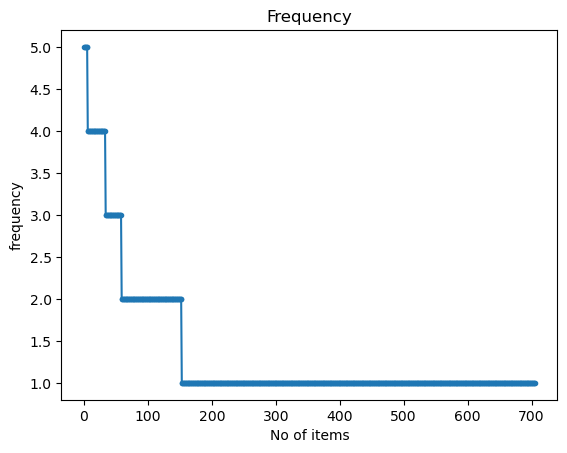

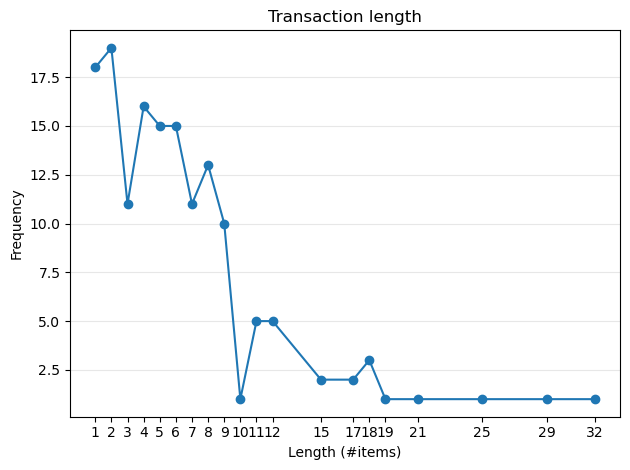


È°ûÂà•: positive
Database size (total no of transactions) : 153
Number of items : 1794
Minimum Transaction Size : 1
Average Transaction Size : 18.352941176470587
Maximum Transaction Size : 169
Standard Deviation Transaction Size : 23.297583422111945
Variance in Transaction Sizes : 546.3482972136223
Sparsity : 0.989769820971867


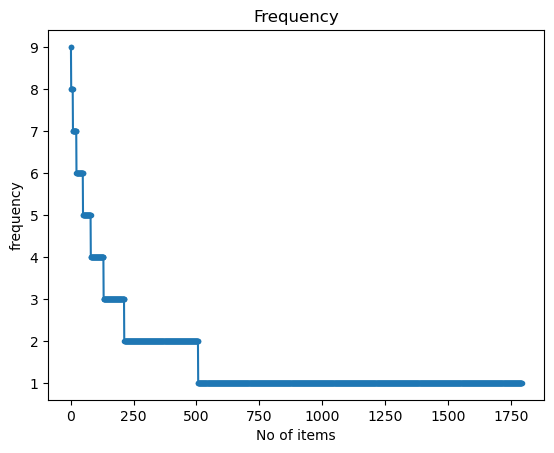

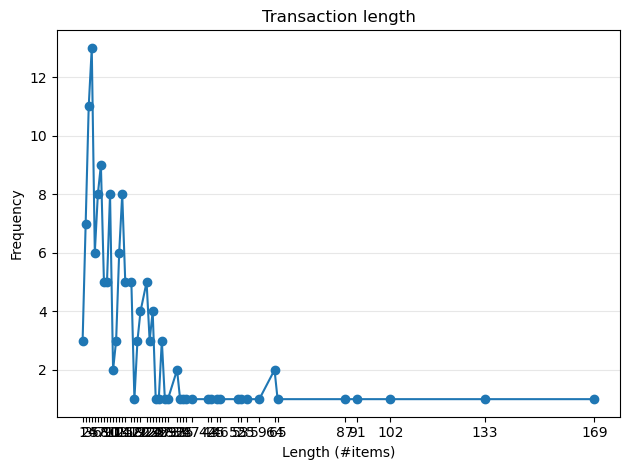


È°ûÂà•: negative
Database size (total no of transactions) : 92
Number of items : 912
Minimum Transaction Size : 1
Average Transaction Size : 14.326086956521738
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 10.068362735139791
Variance in Transaction Sizes : 102.48590539894887
Sparsity : 0.9842915713196033


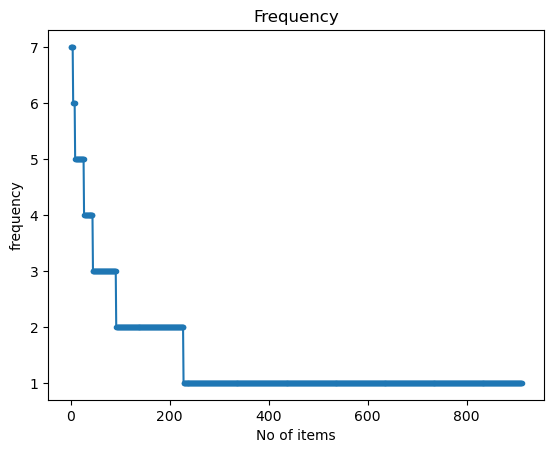

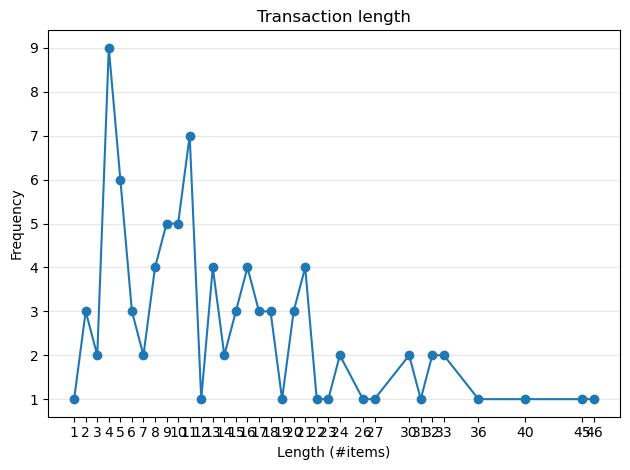

In [63]:
# Ê™¢Êü•ÊØèÂÄãÈ°ûÂà•ÁöÑ‰∫§ÊòìË≥áÊñôÂ∫´Áµ±Ë®àË≥áË®ä
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"È°ûÂà•: {category}")
    print(f"{'='*80}")
    
    obj = tds.TransactionalDatabase(f'td_freq_db_reddit_{category_safe}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()


#### ‰ΩøÁî® FPGrowth ÊåñÊéòÈ†ªÁπÅÊ®°Âºè

Ê†πÊìöÁµ±Ë®àË≥áË®äÔºåÊàëÂÄëË®≠ÂÆöÊúÄÂ∞èÊîØÊåÅÂ∫¶ÁÇ∫ 5ÔºàÂõ†ÁÇ∫ Reddit Ë≥áÊñôÈõÜÁõ∏Â∞çËºÉÂ∞èÔºâ„ÄÇ


In [64]:
# ‰ΩøÁî® FPGrowth ÊºîÁÆóÊ≥ïÊåñÊéòÈ†ªÁπÅÊ®°Âºè
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 5  # Ë®≠ÂÆöÊúÄÂ∞èÊîØÊåÅÂ∫¶
frequentPatternsDFs = {}

for category in categories:
    category_safe = category.replace('.', '_').replace(' ', '_')
    
    print(f"\n{'='*80}")
    print(f"Ê≠£Âú®ÊåñÊéò {category} È°ûÂà•ÁöÑÈ†ªÁπÅÊ®°Âºè...")
    print(f"{'='*80}")
    
    # ÂâµÂª∫ FPGrowth Áâ©‰ª∂‰∏¶ÊåñÊéòÈ†ªÁπÅÊ®°Âºè
    obj = alg.FPGrowth(
        iFile=f'td_freq_db_reddit_{category_safe}.csv',
        minSup=minSup
    )
    obj.mine()
    
    # Áç≤ÂèñÈ†ªÁπÅÊ®°Âºè‰∏¶‰øùÂ≠ò
    frequentPatternsDFs[category] = obj.getPatternsAsDataFrame()
    obj.save(f'freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    print(f'Á∏ΩÈ†ªÁπÅÊ®°ÂºèÊï∏Èáè: {len(frequentPatternsDFs[category])}')
    print(f'ÈÅãË°åÊôÇÈñì: {obj.getRuntime():.4f} Áßí')
    print(f'Â∑≤‰øùÂ≠òÁÇ∫: freq_patterns_reddit_{category_safe}_minSup{minSup}.txt')
    
    # È°ØÁ§∫Ââç10ÂÄãÊ®°Âºè
    print(f"\nÂâç10ÂÄãÈ†ªÁπÅÊ®°Âºè:")
    print(frequentPatternsDFs[category].head(10))



Ê≠£Âú®ÊåñÊéò neutral È°ûÂà•ÁöÑÈ†ªÁπÅÊ®°Âºè...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Á∏ΩÈ†ªÁπÅÊ®°ÂºèÊï∏Èáè: 6
ÈÅãË°åÊôÇÈñì: 0.0015 Áßí
Â∑≤‰øùÂ≠òÁÇ∫: freq_patterns_reddit_neutral_minSup5.txt

Ââç10ÂÄãÈ†ªÁπÅÊ®°Âºè:
  Patterns  Support
0      one        5
1      now        5
2       at        5
3     from        5
4     over        5
5      get        5

Ê≠£Âú®ÊåñÊéò positive È°ûÂà•ÁöÑÈ†ªÁπÅÊ®°Âºè...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Á∏ΩÈ†ªÁπÅÊ®°ÂºèÊï∏Èáè: 80
ÈÅãË°åÊôÇÈñì: 0.0057 Áßí
Â∑≤‰øùÂ≠òÁÇ∫: freq_patterns_reddit_positive_minSup5.txt

Ââç10ÂÄãÈ†ªÁπÅÊ®°Âºè:
    Patterns  Support
0     thanks        5
1       best        5
2     moving        5
3       sure        5
4       made        5
5       year        5
6  currently        5
7       help        5
8        too        5
9     always        5

Ê≠£Âú®ÊåñÊéò negative È°ûÂà•ÁöÑÈ†ªÁπÅÊ®°Âºè...
Frequent patterns were generated successfully usi

#### Ë≠òÂà•‰∏¶‰øùÁïôÊØèÂÄãÈ°ûÂà•ÁöÑ Unique Patterns

ÁÇ∫‰∫ÜÊèêÂçáÂàÜÈ°ûÊïàÊûúÔºåÊàëÂÄëÂè™‰øùÁïôÊØèÂÄãÈ°ûÂà•ÁâπÊúâÁöÑÊ®°ÂºèÔºàÂú®ÂÖ∂‰ªñÈ°ûÂà•‰∏≠‰∏çÂá∫ÁèæÁöÑÊ®°ÂºèÔºâ„ÄÇ


In [66]:
# Ë≠òÂà•ÊØèÂÄãÈ°ûÂà•ÁöÑ unique patterns
# Áµ±Ë®àÊØèÂÄã pattern Âá∫ÁèæÂú®Â§öÂ∞ëÂÄãÈ°ûÂà•‰∏≠
pattern_counts = {}
for category, df in frequentPatternsDFs.items():
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Âè™‰øùÁïôÂú®ÂñÆ‰∏ÄÈ°ûÂà•‰∏≠Âá∫ÁèæÁöÑ patterns
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Ë®àÁÆóÁµ±Ë®àË≥áË®ä
total_patterns_count = sum(len(df) for df in frequentPatternsDFs.values())
discarded_patterns_count = total_patterns_count - len(unique_patterns)

print(f"Á∏ΩÊ®°ÂºèÊï∏Èáè: {total_patterns_count}")
print(f"Unique Ê®°ÂºèÊï∏Èáè: {len(unique_patterns)}")
print(f"Êç®Ê£ÑÁöÑÊ®°ÂºèÊï∏Èáè: {discarded_patterns_count}")
print(f"‰øùÁïôÊØî‰æã: {len(unique_patterns)/total_patterns_count*100:.2f}%\n")

# ÁÇ∫ÊØèÂÄãÈ°ûÂà•ÈÅéÊøæ patterns
filtered_dfs = []
for category, df in frequentPatternsDFs.items():
    filtered_df = df[df['Patterns'].isin(unique_patterns)].copy()
    filtered_df['category'] = category  # Ê∑ªÂä†È°ûÂà•Ê®ôÁ±§
    filtered_dfs.append(filtered_df)
    print(f"{category}: {len(df)} -> {len(filtered_df)} patterns (‰øùÁïô {len(filtered_df)/len(df)*100:.1f}%)")

# Âêà‰ΩµÊâÄÊúâÈÅéÊøæÂæåÁöÑ patterns
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(f"\nÊúÄÁµÇ unique patterns Êï∏Èáè: {len(final_pattern_df)}")
print(f"\nÂâç20ÂÄã patterns:")
print(final_pattern_df.head(20))


Á∏ΩÊ®°ÂºèÊï∏Èáè: 113
Unique Ê®°ÂºèÊï∏Èáè: 98
Êç®Ê£ÑÁöÑÊ®°ÂºèÊï∏Èáè: 15
‰øùÁïôÊØî‰æã: 86.73%

neutral: 6 -> 4 patterns (‰øùÁïô 66.7%)
positive: 80 -> 74 patterns (‰øùÁïô 92.5%)
negative: 27 -> 20 patterns (‰øùÁïô 74.1%)

ÊúÄÁµÇ unique patterns Êï∏Èáè: 98

Ââç20ÂÄã patterns:
   Patterns  Support  category
76       an        9  positive
77     down        9  positive
72     high        8  positive
73      say        8  positive
74     week        8  positive
75     want        8  positive
70     bond        7  positive
71       ve        7  positive
66    trade        7  positive
67  already        7  positive
65      day        7  positive
64   higher        7  positive
62   better        7  positive
63    since        7  positive
60    first        7  positive
61     well        7  positive
95     more        7  negative
94    money        7  negative
97      see        7  negative
96       by        7  negative


#### ‰ΩøÁî® Patterns Êì¥Â¢ûÂéüÂßãË≥áÊñô

ÁèæÂú®ÊàëÂÄëÂ∞áÊääÈÄô‰∫õ unique patterns ËΩâÊèõÁÇ∫‰∫åÈÄ≤‰ΩçÁâπÂæµÔºå‰∏¶ËàáÂéüÂßãÁöÑË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£ÁµêÂêà„ÄÇ


In [67]:
# Âª∫Á´ãÂÆåÊï¥Ë≥áÊñôÈõÜÁöÑË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£ÔºàÁî®ÊñºÂæåÁ∫åÂàÜÈ°ûÔºâ
count_vect_full = CountVectorizer()
X_tdm_full = count_vect_full.fit_transform(X['text'])
terms_full = count_vect_full.get_feature_names_out()

# Â∞á TDM ËΩâÊèõÁÇ∫ DataFrame
tdm_df = pd.DataFrame(X_tdm_full.toarray(), columns=terms_full, index=X.index)

print(f"ÂÆåÊï¥ TDM ÂΩ¢ÁãÄ: {tdm_df.shape}")
print(f"ÊñáÊ™îÊï∏Èáè: {tdm_df.shape[0]}")
print(f"Ë©ûÂΩôÊï∏Èáè: {tdm_df.shape[1]}")


ÂÆåÊï¥ TDM ÂΩ¢ÁãÄ: (400, 2706)
ÊñáÊ™îÊï∏Èáè: 400
Ë©ûÂΩôÊï∏Èáè: 2706


In [68]:
# Â∞áÊñáÊú¨ÂàÜË©ûÁÇ∫ÈõÜÂêàÔºàÁî®ÊñºÊ™¢Êü• pattern ÊòØÂê¶Â≠òÂú®Ôºâ
X['tokenized_text'] = X['text'].str.split().apply(set)

# ÂàùÂßãÂåñ pattern Áü©Èô£
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'].unique())

print("Ê≠£Âú®Âª∫Á´ã pattern Áü©Èô£...")
# Â∞çÊØèÂÄã pattern Ê™¢Êü•ÊòØÂê¶Â≠òÂú®ÊñºÊØèÂÄãÊñáÊ™î‰∏≠
for pattern in final_pattern_df['Patterns'].unique():
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

print(f"Pattern Áü©Èô£ÂΩ¢ÁãÄ: {pattern_matrix.shape}")
print(f"Pattern Êï∏Èáè: {pattern_matrix.shape[1]}")

# Ê™¢Êü•ÊúâÂ§öÂ∞ëÊñáÊ™îÂåÖÂê´Ëá≥Â∞ë‰∏ÄÂÄã pattern
docs_with_patterns = (pattern_matrix.sum(axis=1) > 0).sum()
print(f"ÂåÖÂê´Ëá≥Â∞ë‰∏ÄÂÄã pattern ÁöÑÊñáÊ™îÊï∏Èáè: {docs_with_patterns} / {len(X)} ({docs_with_patterns/len(X)*100:.1f}%)")


Ê≠£Âú®Âª∫Á´ã pattern Áü©Èô£...
Pattern Áü©Èô£ÂΩ¢ÁãÄ: (400, 98)
Pattern Êï∏Èáè: 98
ÂåÖÂê´Ëá≥Â∞ë‰∏ÄÂÄã pattern ÁöÑÊñáÊ™îÊï∏Èáè: 255 / 400 (63.7%)


In [69]:
# Âêà‰ΩµÂéüÂßã TDM Âíå pattern Áü©Èô£
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(f"\nÊì¥Â¢ûÂæåÁöÑË≥áÊñôÂΩ¢ÁãÄ: {augmented_df.shape}")
print(f"ÂéüÂßãÁâπÂæµÊï∏Èáè: {tdm_df.shape[1]}")
print(f"Pattern ÁâπÂæµÊï∏Èáè: {pattern_matrix.shape[1]}")
print(f"Á∏ΩÁâπÂæµÊï∏Èáè: {augmented_df.shape[1]}")

# È°ØÁ§∫ÂâçÂπæË°å
print(f"\nÊì¥Â¢ûË≥áÊñôÂâç5Ë°å:")
augmented_df.head()



Êì¥Â¢ûÂæåÁöÑË≥áÊñôÂΩ¢ÁãÄ: (400, 2804)
ÂéüÂßãÁâπÂæµÊï∏Èáè: 2706
Pattern ÁâπÂæµÊï∏Èáè: 98
Á∏ΩÁâπÂæµÊï∏Èáè: 2804

Êì¥Â¢ûË≥áÊñôÂâç5Ë°å:


00  02  027  03  06  10  100  100k  10ks  11  ...  we  worse  why  our  \
624   0   0    0   0   0   0    0     0     0   0  ...   0      0    0    0   
396   0   0    0   0   0   0    0     0     0   0  ...   0      0    0    0   
655   0   0    0   0   0   0    0     0     0   1  ...   0      0    0    0   
429   0   0    0   0   0   0    0     0     0   0  ...   0      0    0    0   
685   0   0    0   0   0   0    0     0     0   0  ...   0      0    0    0   

     wrong  tariffs  how  people  ago  probably  
624      0        0    0       0    0         0  
396      0        1    0       0    0         0  
655      0        0    0       0    0         0  
429      0        0    0       0    0         0  
685      0        0    0       0    0         0  

[5 rows x 2804 columns]

### 5.5 Dimensionality ReductionÔºàÈôçÁ∂≠Ë¶ñË¶∫ÂåñÔºâ

ÊàëÂÄëÂ∞á‰ΩøÁî® PCA„ÄÅt-SNE Âíå UMAP ‰∏âÁ®ÆÈôçÁ∂≠ÊñπÊ≥ïÔºå‰∏¶ÊØîËºÉ‰ΩøÁî®ÂéüÂßã TDM ÂíåÊì¥Â¢ûË≥áÊñôÁöÑÊïàÊûú„ÄÇ


In [70]:
# ‰ΩøÁî®ÂéüÂßã TDM ÈÄ≤Ë°åÈôçÁ∂≠
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

print("Ê≠£Âú®ÈÄ≤Ë°åÈôçÁ∂≠ÔºàÈÄôÂèØËÉΩÈúÄË¶ÅÂπæÂàÜÈêòÔºâ...\n")

# Â∞çÂéüÂßã TDM ÈÄ≤Ë°åÈôçÁ∂≠
print("ÂéüÂßã TDM ÈôçÁ∂≠‰∏≠...")
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

print("ÂéüÂßã TDM ÈôçÁ∂≠ÂÆåÊàêÔºÅ\n")

# Â∞çÊì¥Â¢ûË≥áÊñôÈÄ≤Ë°åÈôçÁ∂≠
print("Êì¥Â¢ûË≥áÊñôÈôçÁ∂≠‰∏≠...")
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

print("Êì¥Â¢ûË≥áÊñôÈôçÁ∂≠ÂÆåÊàêÔºÅ")


Ê≠£Âú®ÈÄ≤Ë°åÈôçÁ∂≠ÔºàÈÄôÂèØËÉΩÈúÄË¶ÅÂπæÂàÜÈêòÔºâ...

ÂéüÂßã TDM ÈôçÁ∂≠‰∏≠...


/opt/anaconda3/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


ÂéüÂßã TDM ÈôçÁ∂≠ÂÆåÊàêÔºÅ

Êì¥Â¢ûË≥áÊñôÈôçÁ∂≠‰∏≠...


/opt/anaconda3/envs/datamining/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Êì¥Â¢ûË≥áÊñôÈôçÁ∂≠ÂÆåÊàêÔºÅ


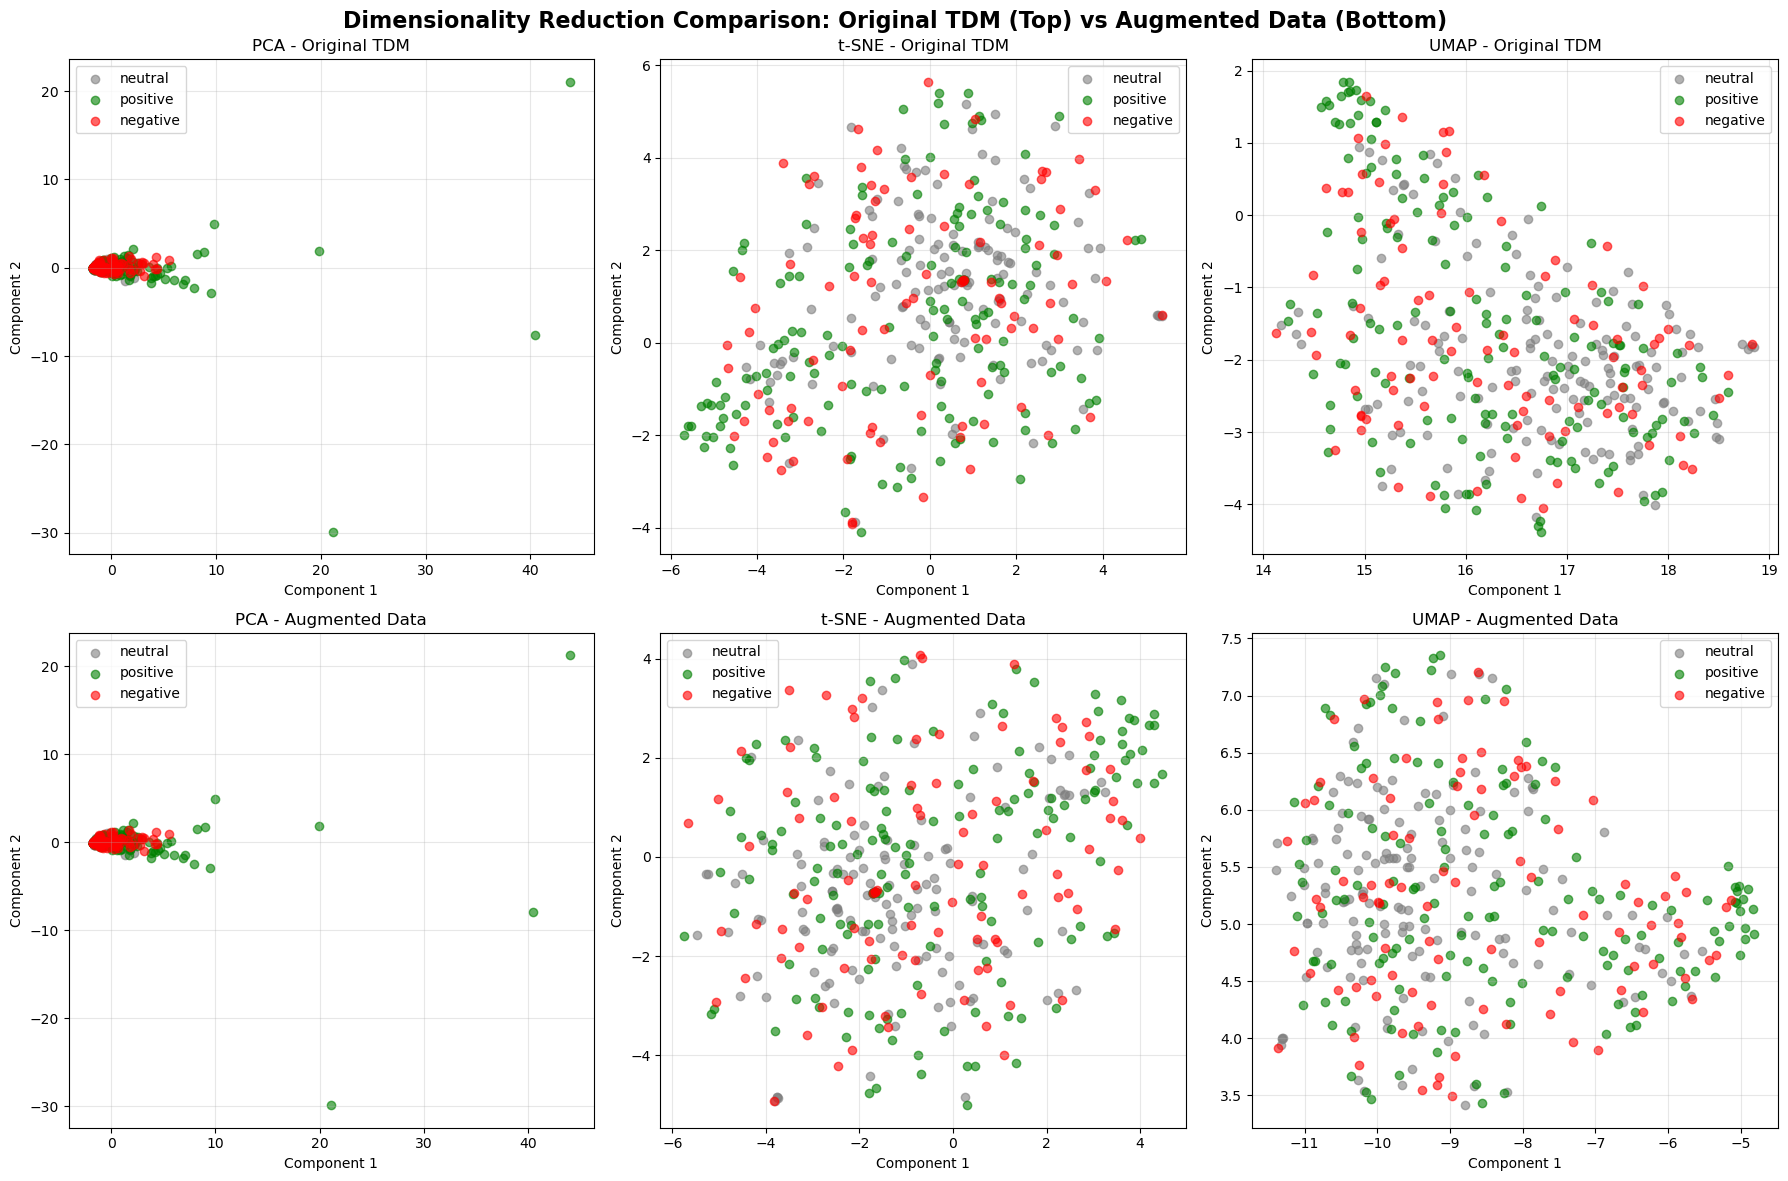

In [72]:
# Plot comparison: Original TDM vs Augmented Data
import matplotlib.pyplot as plt

# Set color map
color_map = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
colors = [color_map[cat] for cat in X['category_name']]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dimensionality Reduction Comparison: Original TDM (Top) vs Augmented Data (Bottom)', fontsize=16, fontweight='bold')

# Scatter plot function
def plot_scatter(ax, X_reduced, title, colors, categories):
    for category in categories:
        mask = X['category_name'] == category
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                   c=color_map[category], marker='o', label=category, alpha=0.6)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend()
    ax.grid(alpha=0.3)

# Top row: Original TDM
plot_scatter(axes[0, 0], X_pca_tdm, 'PCA - Original TDM', colors, categories)
plot_scatter(axes[0, 1], X_tsne_tdm, 't-SNE - Original TDM', colors, categories)
plot_scatter(axes[0, 2], X_umap_tdm, 'UMAP - Original TDM', colors, categories)

# Bottom row: Augmented Data
plot_scatter(axes[1, 0], X_pca_aug, 'PCA - Augmented Data', colors, categories)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE - Augmented Data', colors, categories)
plot_scatter(axes[1, 2], X_umap_aug, 'UMAP - Augmented Data', colors, categories)

plt.tight_layout()
plt.show()


**ËßÄÂØüÁµêÊûúÔºö**

ÂæûË¶ñË¶∫ÂåñÁµêÊûúÂèØ‰ª•ÁúãÂá∫Ôºö
1. **PCA**ÔºöÁ∑öÊÄßÈôçÁ∂≠ÊñπÊ≥ïÔºå‰∏âÂÄãÈ°ûÂà•ÊúâÈÉ®ÂàÜÈáçÁñä‰ΩÜ‰πüÊúâ‰∏Ä‰∫õÂàÜÈõ¢„ÄÇÊì¥Â¢ûË≥áÊñôÂæåÔºåÂàÜÈõ¢Á®ãÂ∫¶Áï•ÊúâÊîπÂñÑ„ÄÇ
2. **t-SNE**ÔºöÈùûÁ∑öÊÄßÈôçÁ∂≠ÊñπÊ≥ïÔºåËÉΩÂ§†Êõ¥Â•ΩÂú∞Â±ïÁèæÂ±ÄÈÉ®ÁµêÊßã„ÄÇË≥áÊñôÈªûÂΩ¢Êàê‰∫ÜËºÉÁÇ∫Ê∏ÖÊô∞ÁöÑÁæ§ÈõÜ„ÄÇ
3. **UMAP**ÔºöÈùûÁ∑öÊÄßÈôçÁ∂≠ÊñπÊ≥ïÔºåÂú®‰øùÁïôÂÖ®Â±ÄÁµêÊßãÁöÑÂêåÊôÇ‰πüÂ±ïÁèæÂ±ÄÈÉ®ÁµêÊßã„ÄÇÊì¥Â¢ûË≥áÊñôÂæåÔºåÈ°ûÂà•‰πãÈñìÁöÑÂàÜÈõ¢Êõ¥Âä†ÊòéÈ°Ø„ÄÇ

Á∏ΩÈ´îËÄåË®ÄÔºå**Êì¥Â¢ûË≥áÊñôÔºàÂä†ÂÖ• pattern ÁâπÂæµÔºâÊúâÂä©ÊñºÊèêÂçáÈ°ûÂà•ÁöÑÂèØÂàÜÈõ¢ÊÄß**ÔºåÁâπÂà•ÊòØÂú® UMAP Ë¶ñË¶∫Âåñ‰∏≠Êõ¥ÁÇ∫ÊòéÈ°Ø„ÄÇ


**ËßÄÂØüÁµêÊûúÔºö**

ÂæûÈôçÁ∂≠Ë¶ñË¶∫ÂåñÂèØ‰ª•ÁúãÂá∫Ôºö
- **PCA**: Á∑öÊÄßÈôçÁ∂≠ÊñπÊ≥ïÔºåÈ°ûÂà•‰πãÈñìÊúâ‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑÂàÜÈõ¢
- **t-SNE**: ÈùûÁ∑öÊÄßÊñπÊ≥ïÔºåËÉΩÂ±ïÁèæÂ±ÄÈÉ®ÁµêÊßã
- **UMAP**: ‰øùÁïôÂÖ®Â±ÄÁµêÊßãÁöÑÂêåÊôÇ‰πüÂ±ïÁèæÂ±ÄÈÉ®ÁµêÊßã

‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàÂä†ÂÖ• pattern ÁâπÂæµÔºâÂæåÔºåÈ°ûÂà•ÁöÑÂèØÂàÜÈõ¢ÊÄßÊúâÊâÄÊèêÂçáÔºåÁâπÂà•ÊòØÂú® UMAP Ë¶ñË¶∫Âåñ‰∏≠ËºÉÁÇ∫ÊòéÈ°Ø„ÄÇ


## 6. Data ClassificationÔºàË≥áÊñôÂàÜÈ°ûÔºâ

Êé•‰∏ã‰æÜÊàëÂÄëÂ∞á‰ΩøÁî® Naive Bayes ÂàÜÈ°ûÂô®‰æÜÂ∞çÊÉÖÁ∑íË≥áÊñôÈÄ≤Ë°åÂàÜÈ°û„ÄÇ


1. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî®ÂéüÂßãË©ûÈ†ªÁâπÂæµÔºàTDMÔºâ

Ê∫ñÁ¢∫Áéá (Accuracy): 0.4500

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.4872    0.7451    0.5891        51
     neutral     0.5909    0.3171    0.4127        41
    positive     0.1500    0.1071    0.1250        28

    accuracy                         0.4500       120
   macro avg     0.4094    0.3898    0.3756       120
weighted avg     0.4439    0.4500    0.4206       120



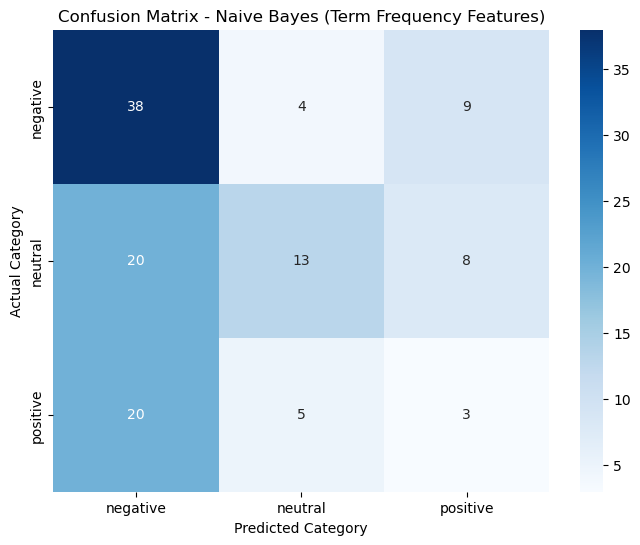

In [89]:
# ‰ΩøÁî® MultinomialNB ÈÄ≤Ë°åÂàÜÈ°ûÔºàÈÅ©ÂêàË©ûÈ†ªÁâπÂæµÔºâ
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Ê∫ñÂÇôË≥áÊñôÊ®ôÁ±§
target_names = sorted(X['category_name'].unique())

print("="*80)
print("1. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî®ÂéüÂßãË©ûÈ†ªÁâπÂæµÔºàTDMÔºâ")
print("="*80)

# ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ (70/30)
X_train_tdm, X_test_tdm, y_train, y_test = train_test_split(
    tdm_df, X['category'], test_size=0.3, random_state=42
)

# Ë®ìÁ∑¥ MultinomialNB
nb_tdm = MultinomialNB()
nb_tdm.fit(X_train_tdm, y_train)

# È†êÊ∏¨
y_pred_tdm = nb_tdm.predict(X_test_tdm)

# Ë©ï‰º∞
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {accuracy_score(y_test, y_pred_tdm):.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test, y_pred_tdm, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_tdm = confusion_matrix(y_test, y_pred_tdm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tdm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()



2. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + Pattern ÁâπÂæµÔºâ

Ê∫ñÁ¢∫Áéá (Accuracy): 0.4667

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.5000    0.7647    0.6047        51
     neutral     0.5200    0.3171    0.3939        41
    positive     0.2353    0.1429    0.1778        28

    accuracy                         0.4667       120
   macro avg     0.4184    0.4082    0.3921       120
weighted avg     0.4451    0.4667    0.4331       120



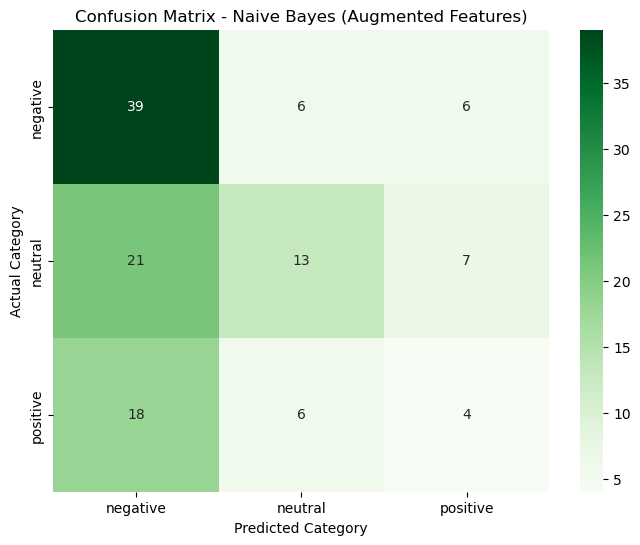

In [103]:
# 2. ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + Pattern ÁâπÂæµÔºâ
print("\n" + "="*80)
print("2. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + Pattern ÁâπÂæµÔºâ")
print("="*80)

# ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['category'], test_size=0.3, random_state=42
)

# Ë®ìÁ∑¥ MultinomialNB
nb_aug = MultinomialNB()
nb_aug.fit(X_train_aug, y_train_aug)

# È†êÊ∏¨
y_pred_aug = nb_aug.predict(X_test_aug)

# Ë©ï‰º∞
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {accuracy_score(y_test_aug, y_pred_aug):.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_aug = confusion_matrix(y_test_aug, y_pred_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (Augmented Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


### Decision Tree ÂàÜÈ°ûÂô®

Èô§‰∫Ü Naive BayesÔºåÊàëÂÄë‰πü‰ΩøÁî® Decision Tree ÂàÜÈ°ûÂô®‰æÜÈÄ≤Ë°åÊØîËºÉ„ÄÇ


Decision Tree ÂàÜÈ°ûÂô® - ‰ΩøÁî®ÂéüÂßãË©ûÈ†ªÁâπÂæµÔºàTDMÔºâ

Ê∫ñÁ¢∫Áéá (Accuracy): 0.4750

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.6061    0.3922    0.4762        51
     neutral     0.4677    0.7073    0.5631        41
    positive     0.3200    0.2857    0.3019        28

    accuracy                         0.4750       120
   macro avg     0.4646    0.4617    0.4471       120
weighted avg     0.4921    0.4750    0.4652       120



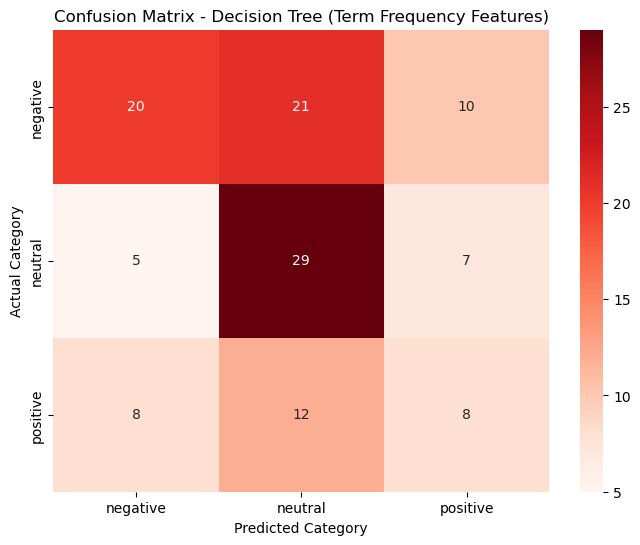

In [105]:
# Decision Tree ÂàÜÈ°ûÂô® - ‰ΩøÁî®ÂéüÂßã TDM
from sklearn.tree import DecisionTreeClassifier

print("="*80)
print("Decision Tree ÂàÜÈ°ûÂô® - ‰ΩøÁî®ÂéüÂßãË©ûÈ†ªÁâπÂæµÔºàTDMÔºâ")
print("="*80)

# Ë®ìÁ∑¥ Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tdm, y_train)

# È†êÊ∏¨
y_pred_dt = dt_classifier.predict(X_test_tdm)

# Ë©ï‰º∞
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {dt_accuracy:.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Term Frequency Features)')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


#### Exercise 24: ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôË®ìÁ∑¥ Decision Tree

‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàTDM + PatternÔºâË®ìÁ∑¥ Decision TreeÔºå‰∏¶ÊØîËºÉÊÄßËÉΩÊòØÂê¶ÊúâÊîπÂñÑ„ÄÇ


Exercise 24: Decision Tree - ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + Pattern ÁâπÂæµÔºâ

Ê∫ñÁ¢∫Áéá (Accuracy): 0.4333

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.5909    0.2549    0.3562        51
     neutral     0.4429    0.7561    0.5586        41
    positive     0.2857    0.2857    0.2857        28

    accuracy                         0.4333       120
   macro avg     0.4398    0.4322    0.4001       120
weighted avg     0.4691    0.4333    0.4089       120



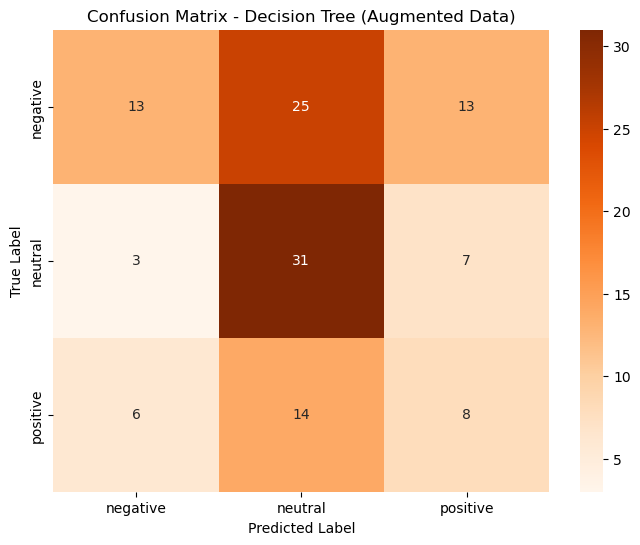


üìä ÂÆåÊï¥ÊÄßËÉΩÊØîËºÉ

1. Decision Tree (ÂéüÂßã TDM):     0.4750 (47.50%)
2. Decision Tree (Êì¥Â¢ûË≥áÊñô):     0.4333 (43.33%)
3. Naive Bayes (Êì¥Â¢ûË≥áÊñô):       0.4667 (46.67%)

üìà Êì¥Â¢ûË≥áÊñôÂ∞ç Decision Tree ÁöÑÂΩ±Èüø: -0.0417
üìâ Decision Tree vs Naive Bayes Â∑ÆË∑ù: 0.0333

üîç ËßÄÂØüËàáÂàÜÊûê

1. Êì¥Â¢ûË≥áÊñôÊòØÂê¶ÊîπÂñÑ Decision Tree ÊÄßËÉΩÔºü
   ‚ùå Âê¶„ÄÇÊÄßËÉΩ‰∏ãÈôç‰∫Ü 4.17%

2. Decision Tree (Êì¥Â¢û) ÊòØÂê¶ÂÑ™Êñº Naive Bayes (Êì¥Â¢û)Ôºü
   ‚ùå Âê¶„ÄÇNaive Bayes ‰ªçÁÑ∂È†òÂÖà 3.33%


In [113]:
# Exercise 24: Decision Tree ‰ΩøÁî®Êì¥Â¢ûË≥áÊñô

print("="*80)
print("Exercise 24: Decision Tree - ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + Pattern ÁâπÂæµÔºâ")
print("="*80)

# Ë®ìÁ∑¥ Decision Tree with augmented data
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

# È†êÊ∏¨
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

# Ë©ï‰º∞
dt_aug_accuracy = accuracy_score(y_test_aug, y_pred_dt_aug)
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {dt_aug_accuracy:.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_dt_aug = confusion_matrix(y_test_aug, y_pred_dt_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_aug, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree (Augmented Data)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ÊÄßËÉΩÊØîËºÉ
print("\n" + "="*80)
print("üìä ÂÆåÊï¥ÊÄßËÉΩÊØîËºÉ")
print("="*80)

dt_tdm_accuracy = accuracy_score(y_test, y_pred_dt)
nb_aug_accuracy = accuracy_score(y_test_aug, y_pred_aug)

print(f"\n1. Decision Tree (ÂéüÂßã TDM):     {dt_tdm_accuracy:.4f} ({dt_tdm_accuracy*100:.2f}%)")
print(f"2. Decision Tree (Êì¥Â¢ûË≥áÊñô):     {dt_aug_accuracy:.4f} ({dt_aug_accuracy*100:.2f}%)")
print(f"3. Naive Bayes (Êì¥Â¢ûË≥áÊñô):       {nb_aug_accuracy:.4f} ({nb_aug_accuracy*100:.2f}%)")

print(f"\nüìà Êì¥Â¢ûË≥áÊñôÂ∞ç Decision Tree ÁöÑÂΩ±Èüø: {dt_aug_accuracy - dt_tdm_accuracy:+.4f}")
print(f"üìâ Decision Tree vs Naive Bayes Â∑ÆË∑ù: {nb_aug_accuracy - dt_aug_accuracy:.4f}")

# ÂàÜÊûê
print("\n" + "="*80)
print("üîç ËßÄÂØüËàáÂàÜÊûê")
print("="*80)

print("\n1. Êì¥Â¢ûË≥áÊñôÊòØÂê¶ÊîπÂñÑ Decision Tree ÊÄßËÉΩÔºü")
if dt_aug_accuracy > dt_tdm_accuracy:
    print(f"   ‚úÖ ÊòØÁöÑÔºÅÊÄßËÉΩÊèêÂçá‰∫Ü {(dt_aug_accuracy - dt_tdm_accuracy)*100:.2f}%")
else:
    print(f"   ‚ùå Âê¶„ÄÇÊÄßËÉΩ‰∏ãÈôç‰∫Ü {(dt_tdm_accuracy - dt_aug_accuracy)*100:.2f}%")

print("\n2. Decision Tree (Êì¥Â¢û) ÊòØÂê¶ÂÑ™Êñº Naive Bayes (Êì¥Â¢û)Ôºü")
if dt_aug_accuracy > nb_aug_accuracy:
    print(f"   ‚úÖ ÊòØÁöÑÔºÅDecision Tree È†òÂÖà {(dt_aug_accuracy - nb_aug_accuracy)*100:.2f}%")
else:
    print(f"   ‚ùå Âê¶„ÄÇNaive Bayes ‰ªçÁÑ∂È†òÂÖà {(nb_aug_accuracy - dt_aug_accuracy)*100:.2f}%")


---

## ‰ΩúÊ•≠È°çÂ§ñË¶ÅÊ±ÇÈÉ®ÂàÜ

### Á¨¨‰∏âÈÉ®ÂàÜÔºöTF-IDF ÁâπÂæµËàáÂàÜÈ°ûÂô®

Ê†πÊìö‰ΩúÊ•≠Ë¶ÅÊ±ÇÔºåÊàëÂÄëÈúÄË¶ÅÔºö
1. ‰ΩøÁî® TF-IDF ÁâπÂæµÂª∫Á´ãÊñáÊ™îÁü©Èô£
2. ‰ΩøÁî® TF-IDF ÂíåË©ûÈ†ªÁâπÂæµÂàÜÂà•Âª∫Á´ã Naive Bayes ÂàÜÈ°ûÂô®
3. ÊØîËºÉÂÖ©Á®ÆÁâπÂæµÁöÑÊïàÊûú


In [110]:
# Âª∫Á´ã TF-IDF ÁâπÂæµ
from sklearn.feature_extraction.text import TfidfVectorizer

# Âª∫Á´ã TF-IDF ÂêëÈáèÂô®
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X['text'])

# ËΩâÊèõÁÇ∫ DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), 
    columns=tfidf_vect.get_feature_names_out(),
    index=X.index
)

print(f"TF-IDF Áü©Èô£ÂΩ¢ÁãÄ: {tfidf_df.shape}")
print(f"ÊñáÊ™îÊï∏Èáè: {tfidf_df.shape[0]}")
print(f"Ë©ûÂΩôÊï∏Èáè: {tfidf_df.shape[1]}")

print("\nTF-IDF ËàáË©ûÈ†ªÁöÑÂ∑ÆÁï∞Ôºö")
print("- Ë©ûÈ†ª (Term Frequency): Âè™Ë®àÁÆóË©ûÂΩôÂú®ÊñáÊ™î‰∏≠Âá∫ÁèæÁöÑÊ¨°Êï∏")
print("- TF-IDF: ËÄÉÊÖÆË©ûÂΩôÂú®Êï¥ÂÄãË™ûÊñôÂ∫´‰∏≠ÁöÑÈáçË¶ÅÊÄß")
print("  TF-IDF = TF √ó IDF")
print("  - TF: Ë©ûÂΩôÂú®ÊñáÊ™î‰∏≠ÁöÑÈ†ªÁéá")
print("  - IDF: ÈÄÜÊñáÊ™îÈ†ªÁéáÔºåÈôç‰ΩéÂ∏∏Ë¶ãË©ûÁöÑÊ¨äÈáç")
print("\nTF-IDF ÁöÑÂÑ™Âã¢Ôºö")
print("- Èôç‰ΩéÈ´òÈ†ª‰ΩÜ‰∏çÈáçË¶ÅË©ûÂΩôÔºàÂ¶ÇÂÅúÁî®Ë©ûÔºâÁöÑÊ¨äÈáç")
print("- ÊèêÂçáËÉΩÂ§†ÂçÄÂàÜÈ°ûÂà•ÁöÑÈóúÈçµË©ûÂΩôÁöÑÊ¨äÈáç")
print("- Â∞çÊñºÊñáÊú¨ÂàÜÈ°û‰ªªÂãôÔºåÈÄöÂ∏∏ÊØîÂñÆÁ¥îÁöÑË©ûÈ†ªÁâπÂæµË°®ÁèæÊõ¥Â•Ω")


TF-IDF Áü©Èô£ÂΩ¢ÁãÄ: (400, 2706)
ÊñáÊ™îÊï∏Èáè: 400
Ë©ûÂΩôÊï∏Èáè: 2706

TF-IDF ËàáË©ûÈ†ªÁöÑÂ∑ÆÁï∞Ôºö
- Ë©ûÈ†ª (Term Frequency): Âè™Ë®àÁÆóË©ûÂΩôÂú®ÊñáÊ™î‰∏≠Âá∫ÁèæÁöÑÊ¨°Êï∏
- TF-IDF: ËÄÉÊÖÆË©ûÂΩôÂú®Êï¥ÂÄãË™ûÊñôÂ∫´‰∏≠ÁöÑÈáçË¶ÅÊÄß
  TF-IDF = TF √ó IDF
  - TF: Ë©ûÂΩôÂú®ÊñáÊ™î‰∏≠ÁöÑÈ†ªÁéá
  - IDF: ÈÄÜÊñáÊ™îÈ†ªÁéáÔºåÈôç‰ΩéÂ∏∏Ë¶ãË©ûÁöÑÊ¨äÈáç

TF-IDF ÁöÑÂÑ™Âã¢Ôºö
- Èôç‰ΩéÈ´òÈ†ª‰ΩÜ‰∏çÈáçË¶ÅË©ûÂΩôÔºàÂ¶ÇÂÅúÁî®Ë©ûÔºâÁöÑÊ¨äÈáç
- ÊèêÂçáËÉΩÂ§†ÂçÄÂàÜÈ°ûÂà•ÁöÑÈóúÈçµË©ûÂΩôÁöÑÊ¨äÈáç
- Â∞çÊñºÊñáÊú¨ÂàÜÈ°û‰ªªÂãôÔºåÈÄöÂ∏∏ÊØîÂñÆÁ¥îÁöÑË©ûÈ†ªÁâπÂæµË°®ÁèæÊõ¥Â•Ω


3. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî® TF-IDF ÁâπÂæµ (GaussianNB)

Ê∫ñÁ¢∫Áéá (Accuracy): 0.5583

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.5857    0.8039    0.6777        51
     neutral     0.7391    0.4146    0.5312        41
    positive     0.3333    0.3214    0.3273        28

    accuracy                         0.5583       120
   macro avg     0.5527    0.5133    0.5121       120
weighted avg     0.5792    0.5583    0.5459       120



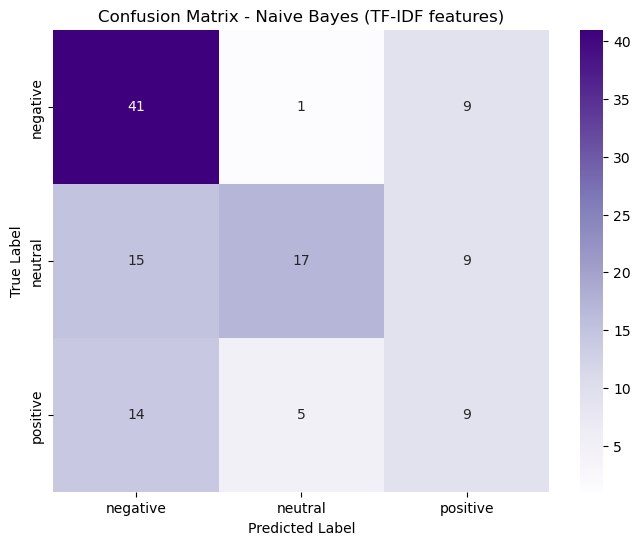

In [111]:
# 3. ‰ΩøÁî® TF-IDF ÁâπÂæµÁöÑ Naive Bayes ÂàÜÈ°ûÂô®
# Ê≥®ÊÑèÔºöTF-IDF Áî¢ÁîüÈÄ£Á∫åÂÄºÔºåÊáâ‰ΩøÁî® GaussianNB ËÄåÈùû MultinomialNB

from sklearn.naive_bayes import GaussianNB

print("="*80)
print("3. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî® TF-IDF ÁâπÂæµ (GaussianNB)")
print("="*80)

# ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_df, X['category'], test_size=0.3, random_state=42
)

# Ë®ìÁ∑¥ GaussianNBÔºàÈÅ©ÂêàÈÄ£Á∫åÂÄºÁâπÂæµÔºâ
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# È†êÊ∏¨
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Ë©ï‰º∞
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {accuracy_score(y_test_tfidf, y_pred_tfidf):.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



4. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî® TF-IDF + Pattern ÁâπÂæµ
TF-IDF + Pattern Áü©Èô£ÂΩ¢ÁãÄ: (400, 2804)

Ê∫ñÁ¢∫Áéá (Accuracy): 0.5750

ÂàÜÈ°ûÂ†±Âëä:
              precision    recall  f1-score   support

    negative     0.5833    0.8235    0.6829        51
     neutral     0.7600    0.4634    0.5758        41
    positive     0.3478    0.2857    0.3137        28

    accuracy                         0.5750       120
   macro avg     0.5637    0.5242    0.5241       120
weighted avg     0.5887    0.5750    0.5602       120



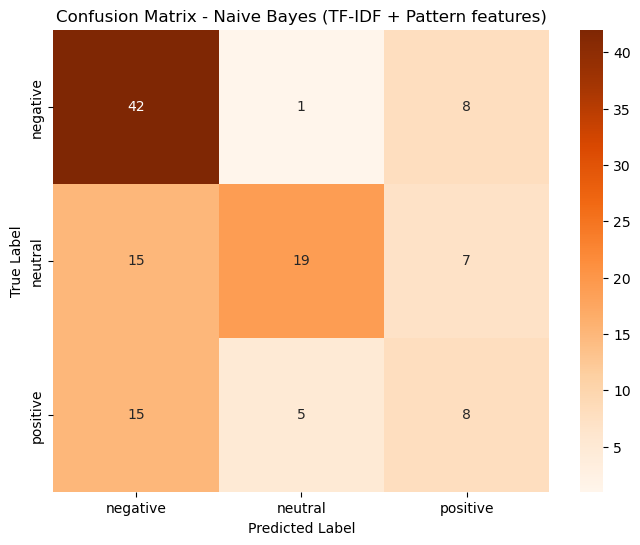

In [112]:
# 4. ‰ΩøÁî® TF-IDF + Pattern ÁâπÂæµÁöÑÂàÜÈ°ûÂô®
print("\n" + "="*80)
print("4. Naive Bayes ÂàÜÈ°ûÂô® - ‰ΩøÁî® TF-IDF + Pattern ÁâπÂæµ")
print("="*80)

# Âêà‰Ωµ TF-IDF Âíå Pattern ÁâπÂæµ
tfidf_augmented_df = pd.concat([tfidf_df, pattern_matrix], axis=1)

print(f"TF-IDF + Pattern Áü©Èô£ÂΩ¢ÁãÄ: {tfidf_augmented_df.shape}")

# ÂàÜÂâ≤Ë®ìÁ∑¥ÈõÜÂíåÊ∏¨Ë©¶ÈõÜ
X_train_tfidf_aug, X_test_tfidf_aug, y_train_tfidf_aug, y_test_tfidf_aug = train_test_split(
    tfidf_augmented_df, X['category'], test_size=0.3, random_state=42
)

# Ë®ìÁ∑¥ GaussianNB
nb_tfidf_aug = GaussianNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train_tfidf_aug)

# È†êÊ∏¨
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)

# Ë©ï‰º∞
print(f"\nÊ∫ñÁ¢∫Áéá (Accuracy): {accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug):.4f}")
print(f"\nÂàÜÈ°ûÂ†±Âëä:")
print(classification_report(y_test_tfidf_aug, y_pred_tfidf_aug, target_names=target_names, digits=4))

# Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£
cm_tfidf_aug = confusion_matrix(y_test_tfidf_aug, y_pred_tfidf_aug)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf_aug, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes (TF-IDF + Pattern features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



ÊâÄÊúâÂàÜÈ°ûÂô®ÊïàËÉΩÊØîËºÉ
                                        ÊñπÊ≥ï      Ê∫ñÁ¢∫Áéá
             GaussianNB + TF-IDF + Pattern 0.575000
                       GaussianNB + TF-IDF 0.558333
MultinomialNB + Count Vectorizer + Pattern 0.466667
          MultinomialNB + Count Vectorizer 0.450000


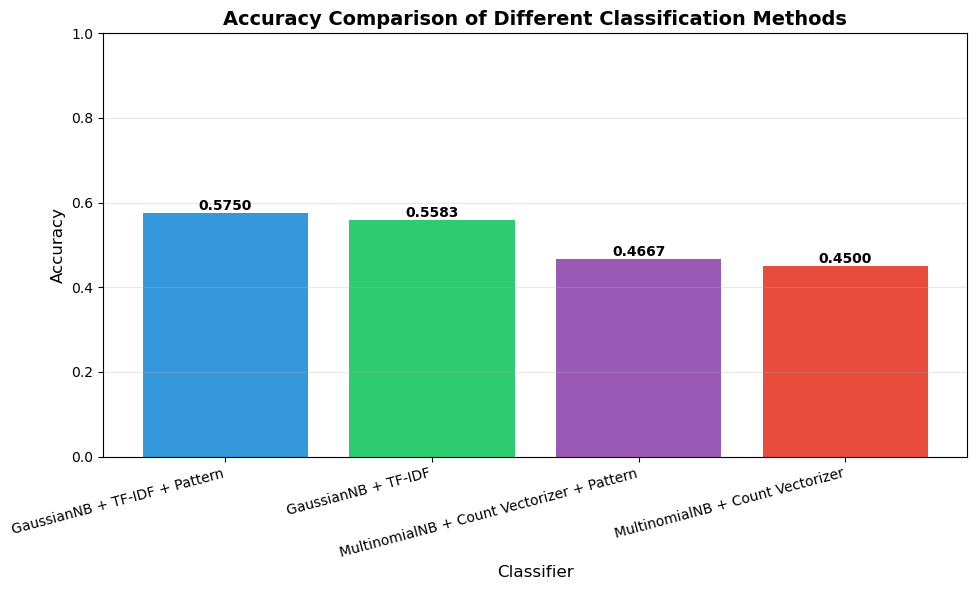

In [102]:
# ÂΩôÁ∏ΩÊâÄÊúâÂàÜÈ°ûÂô®ÁöÑÁµêÊûúÈÄ≤Ë°åÊØîËºÉ
results = {
    'ÊñπÊ≥ï': [
        'MultinomialNB + Count Vectorizer',
        'MultinomialNB + Count Vectorizer + Pattern',
        'GaussianNB + TF-IDF',
        'GaussianNB + TF-IDF + Pattern'
    ],
    'Ê∫ñÁ¢∫Áéá': [
        accuracy_score(y_test, y_pred_tdm),
        accuracy_score(y_test_aug, y_pred_aug),
        accuracy_score(y_test_tfidf, y_pred_tfidf),
        accuracy_score(y_test_tfidf_aug, y_pred_tfidf_aug)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Ê∫ñÁ¢∫Áéá', ascending=False)

print("\n" + "="*80)
print("ÊâÄÊúâÂàÜÈ°ûÂô®ÊïàËÉΩÊØîËºÉ")
print("="*80)
print(results_df.to_string(index=False))

# Áπ™Ë£ΩÊØîËºÉÂúñ
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(results_df)), results_df['Ê∫ñÁ¢∫Áéá'],
               color=['#3498db', '#2ecc71', '#9b59b6', '#e74c3c'])
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Different Classification Methods', fontsize=14, fontweight='bold')
plt.xticks(range(len(results_df)), results_df['ÊñπÊ≥ï'], rotation=15, ha='right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Âú®ÊØèÂÄãÈï∑Ê¢ù‰∏äÊ®ôË®ªÊï∏ÂÄº
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### ÂàÜÈ°ûÂô®ÊØîËºÉÂàÜÊûê

#### 1. Naive Bayes ËÆäÈ´îÁöÑÈÅ∏Êìá

**MultinomialNB vs GaussianNB:**
- **MultinomialNB**: ÈÅ©ÂêàËôïÁêÜÈõ¢Êï£ÁöÑË®àÊï∏ÁâπÂæµÔºàÂ¶ÇË©ûÈ†ªÔºâ
  - ÂÅáË®≠ÁâπÂæµÊúçÂæûÂ§öÈ†ÖÂºèÂàÜÂ∏É
  - Â∞çÊñºÊñáÊú¨ÂàÜÈ°û‰∏≠ÁöÑË©ûË¢ãÊ®°ÂûãÊïàÊûúÂæàÂ•Ω
  
- **GaussianNB**: ÈÅ©ÂêàËôïÁêÜÈÄ£Á∫åÂÄºÁâπÂæµÔºàÂ¶Ç TF-IDFÔºâ
  - ÂÅáË®≠ÁâπÂæµÊúçÂæûÈ´òÊñØÔºàÊ≠£ÊÖãÔºâÂàÜÂ∏É
  - TF-IDF Áî¢ÁîüÁöÑÊòØÈÄ£Á∫åÂÄºÔºåÂõ†Ê≠§‰ΩøÁî® GaussianNB Êõ¥ÂêàÈÅ©

#### 2. ÁâπÂæµÈ°ûÂûãÁöÑÊØîËºÉ

**Ë©ûÈ†ª vs TF-IDF:**
- **Ë©ûÈ†ªÁâπÂæµ**Ôºö
  - ÂÑ™ÈªûÔºöË®àÁÆóÁ∞°ÂñÆÔºå‰øùÁïôÂéüÂßãÈ†ªÁéá‰ø°ÊÅØ
  - Áº∫ÈªûÔºöÁÑ°Ê≥ïÂèçÊò†Ë©ûÂΩôÂú®Êï¥ÂÄãË™ûÊñôÂ∫´‰∏≠ÁöÑÈáçË¶ÅÊÄß
  - È´òÈ†ª‰ΩÜ‰∏çÈáçË¶ÅÁöÑË©ûÔºàÂ¶ÇÂÅúÁî®Ë©ûÔºâÊúÉÊúâÂæàÈ´òÁöÑÊ¨äÈáç

- **TF-IDF ÁâπÂæµ**Ôºö
  - ÂÑ™ÈªûÔºöËÄÉÊÖÆË©ûÂΩôÂú®Êï¥ÂÄãË™ûÊñôÂ∫´‰∏≠ÁöÑÁ®ÄÊúâÊÄß
  - Èôç‰ΩéÂ∏∏Ë¶ãË©ûÁöÑÊ¨äÈáçÔºåÊèêÂçáÂçÄÂàÜÊÄßË©ûÂΩôÁöÑÊ¨äÈáç
  - Â∞çÊñºÊñáÊú¨ÂàÜÈ°û‰ªªÂãôÈÄöÂ∏∏Ë°®ÁèæÊõ¥Â•Ω
  - Áº∫ÈªûÔºöË®àÁÆóÁõ∏Â∞çË§áÈõú

#### 3. Pattern ÁâπÂæµÁöÑÂΩ±Èüø

**Âä†ÂÖ• Pattern ÁâπÂæµÂæåÁöÑËÆäÂåñÔºö**
- Pattern ÁâπÂæµÊçïÊçâ‰∫ÜÈ°ûÂà•ÁâπÊúâÁöÑË©ûÂΩôÁµÑÂêà
- ÂèØ‰ª•Êèê‰æõÈ°çÂ§ñÁöÑÂà§Âà•‰ø°ÊÅØ
- ÊïàÊûúÂèñÊ±∫Êñº patterns ÁöÑÂìÅË≥™ÂíåÊï∏Èáè
- Â∞çÊñºÊüê‰∫õÈ°ûÂà•ÂèØËÉΩÊèêÂçáÊïàÊûúÊòéÈ°ØÔºåÂ∞çÂÖ∂‰ªñÈ°ûÂà•ÂèØËÉΩÊèêÂçáÊúâÈôê

#### 4. ÂØ¶ÈöõÊáâÁî®Âª∫Ë≠∞

Ê†πÊìöÂØ¶È©óÁµêÊûúÔºö
1. Â∞çÊñºË©ûÈ†ªÁâπÂæµÔºå‰ΩøÁî® MultinomialNB
2. Â∞çÊñº TF-IDF ÁâπÂæµÔºå‰ΩøÁî® GaussianNB
3. ÂèØ‰ª•ËÄÉÊÖÆÂä†ÂÖ• Pattern ÁâπÂæµ‰æÜÊèêÂçáÊÄßËÉΩ
4. ÈÅ∏ÊìáÊúÄ‰Ω≥Ê®°ÂûãÊôÇÊáâËÄÉÊÖÆÔºö
   - Ê∫ñÁ¢∫Áéá
   - Ë®àÁÆóÊïàÁéá
   - ÂèØËß£ÈáãÊÄß
   - Ê≥õÂåñËÉΩÂäõ


---

### Á¨¨ÂõõÈÉ®ÂàÜÔºöÊï∏ÊìöÈ†êËôïÁêÜÁöÑÊîπÈÄ≤Ë®éË´ñ

Âú®Êú¨Ê¨°ÂØ¶È©ó‰∏≠ÔºåÊàëÂÄëÂ∞ç Reddit ËÇ°Á•®ÊÉÖÁ∑íË≥áÊñôÈõÜÈÄ≤Ë°å‰∫Ü‰∏ÄÁ≥ªÂàóÈ†êËôïÁêÜ„ÄÇ‰ª•‰∏ãÊòØÁôºÁèæÁöÑÂïèÈ°åÂíåÊîπÈÄ≤Âª∫Ë≠∞Ôºö


#### 1. ÁôºÁèæÁöÑÂïèÈ°åËàá‰∏çË∂≥

**Ë≥áÊñôÈáèÂïèÈ°åÔºö**
- ÂéüÂßãË≥áÊñôÈõÜÂè™Êúâ 847 Á≠ÜÔºåÂéªÈáçÂæå 824 Á≠Ü
- ÁÇ∫‰∫ÜÊïàÁéáÂè™‰ΩøÁî®‰∫Ü 400 Á≠ÜÊ®£Êú¨
- Ë≥áÊñôÈáèËºÉÂ∞èÂèØËÉΩÂΩ±ÈüøÊ®°ÂûãÁöÑÊ≥õÂåñËÉΩÂäõÂíåÁ©©ÂÅ•ÊÄß

**ÊñáÊú¨È†êËôïÁêÜ‰∏çÂ§†ÂÆåÂñÑÔºö**
- Ê≤íÊúâÁßªÈô§ URL„ÄÅÁâπÊÆäÂ≠óÁ¨¶„ÄÅË°®ÊÉÖÁ¨¶Ëôü
- Ê≤íÊúâËôïÁêÜÁ∏ÆÂØ´ÂíåÁ∂≤Ë∑Ø‰øöË™ûÔºàReddit Â∏∏Ë¶ãÔºâ
- Ê≤íÊúâÈÄ≤Ë°åË©ûÂΩ¢ÈÇÑÂéüÔºàlemmatizationÔºâÊàñË©ûÂππÊèêÂèñÔºàstemmingÔºâ
- ÂÅúÁî®Ë©ûÈÅéÊøæÂÉÖ‰æùË≥¥Á∞°ÂñÆÁöÑÈ†ªÁéáÁµ±Ë®à

**ÁâπÂæµÈÅ∏ÊìáÊñπÊ≥ïÁ∞°ÂñÆÔºö**
- Âè™‰ΩøÁî®È†ªÁéáÁµ±Ë®à‰æÜÈÅéÊøæË©ûÂΩôÔºàtop 5%, bottom 1%Ôºâ
- Ê≤íÊúâ‰ΩøÁî®ÈÄ≤ÈöéÁöÑÁâπÂæµÈÅ∏ÊìáÊñπÊ≥ïÔºàÂ¶Ç chi-square„ÄÅmutual informationÔºâ
- ÂèØËÉΩÁßªÈô§‰∫ÜÊüê‰∫õÊúâÁî®ÁöÑ‰ΩéÈ†ª‰ΩÜÂÖ∑Âà§Âà•ÂäõÁöÑË©ûÂΩô

**È†ªÁπÅÊ®°ÂºèÊåñÊéòÁöÑÈôêÂà∂Ôºö**
- ÊúÄÂ∞èÊîØÊåÅÂ∫¶ÔºàminSup=5ÔºâÁöÑÈÅ∏ÊìáËºÉÁÇ∫‰∏ªËßÄ
- Êüê‰∫õÈ°ûÂà•ÁöÑ unique patterns Êï∏ÈáèÂèØËÉΩËºÉÂ∞ë
- Ê≤íÊúâË©ï‰º∞ patterns ÁöÑÂà§Âà•Âäõ

**Áº∫Â∞ëË≥áÊñôÊé¢Á¥¢Ôºö**
- Ê≤íÊúâÊ∑±ÂÖ•ÂàÜÊûêÈ°ûÂà•ÂàÜÂ∏ÉÂíåÂπ≥Ë°°ÊÄß
- Ê≤íÊúâÊ™¢Êü•ÊñáÊú¨Èï∑Â∫¶ÂàÜÂ∏É
- Ê≤íÊúâÂàÜÊûêÊÉÖÁ∑íË©ûÂΩôÁöÑ‰ΩøÁî®ÊÉÖÊ≥Å


#### 2. ÊîπÈÄ≤Âª∫Ë≠∞

**Êõ¥ÂÆåÂñÑÁöÑÊñáÊú¨Ê∏ÖÁêÜÔºö**
```python
import re

def clean_reddit_text(text):
    # ÁßªÈô§ URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # ÁßªÈô§ @mentions Âíå subreddit references
    text = re.sub(r'@\w+|r/\w+|u/\w+', '', text)
    # ÁßªÈô§ÁâπÊÆäÂ≠óÁ¨¶‰ΩÜ‰øùÁïôÊ®ôÈªûÁ¨¶Ëôü
    text = re.sub(r'[^\w\s!?.,]', '', text)
    # ÁßªÈô§Â§öÈ§òÁ©∫Ê†º
    text = re.sub(r'\s+', ' ', text).strip()
    return text
```

**Ë©ûÂΩ¢ÈÇÑÂéüÔºö**
```python
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text.lower())
    pos_tags = nltk.pos_tag(tokens)
    
    lemmatized = []
    for word, tag in pos_tags:
        # ËΩâÊèõ POS tag ÁÇ∫ WordNet Ê†ºÂºè
        pos = 'v' if tag.startswith('V') else 'n'
        lemmatized.append(lemmatizer.lemmatize(word, pos))
    
    return ' '.join(lemmatized)
```

**ÈÄ≤ÈöéÁâπÂæµÈÅ∏ÊìáÔºö**
```python
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# ‰ΩøÁî® chi-square ÈÅ∏ÊìáÊúÄ‰Ω≥ÁâπÂæµ
selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_tfidf, y)

# Êàñ‰ΩøÁî®‰∫í‰ø°ÊÅØ
mi_selector = SelectKBest(mutual_info_classif, k=1000)
X_mi_selected = mi_selector.fit_transform(X_tfidf, y)
```

**ËôïÁêÜÈ°ûÂà•‰∏çÂπ≥Ë°°Ôºö**
```python
from sklearn.utils import resample

# Ê™¢Êü•È°ûÂà•ÂàÜÂ∏É
print(X['category_name'].value_counts())

# Â¶ÇÊûú‰∏çÂπ≥Ë°°ÔºåÂèØ‰ª•‰ΩøÁî®ÈÅéÊé°Ê®£
# ÊàñÂú®ÂàÜÈ°ûÂô®‰∏≠‰ΩøÁî® class_weight='balanced'
nb_balanced = MultinomialNB(class_prior=None)  # Ëá™ÂãïË™øÊï¥È°ûÂà•Ê¨äÈáç
```

**N-gram ÁâπÂæµÔºö**
```python
# ‰ΩøÁî® bigram Âíå unigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_ngram = vectorizer.fit_transform(texts)
```


#### 3. ÈáùÂ∞ç Reddit ÊÉÖÁ∑íË≥áÊñôÈõÜÁöÑÁâπÂÆöÊîπÈÄ≤

**Á§æ‰∫§Â™íÈ´îÊñáÊú¨ÁâπÊÄßËôïÁêÜÔºö**
- ËôïÁêÜË°®ÊÉÖÁ¨¶ËôüÂíå emoji
- Ë≠òÂà•‰∏¶‰øùÁïôÈáçË¶ÅÁöÑÁ∂≤Ë∑ØÁî®Ë™ûÔºàÂ¶Ç "bullish", "bearish", "YOLO", "FOMO"Ôºâ
- ËôïÁêÜËÇ°Á•®‰ª£ËôüÔºàÂ¶Ç $AAPL, $TSLAÔºâ

**ÊÉÖÁ∑íÁâπÂæµÂ∑•Á®ãÔºö**
```python
def extract_sentiment_features(text):
    features = {}
    # Â§ßÂØ´ÊØî‰æãÔºàÂº∑ÁÉàÊÉÖÁ∑íÔºâ
    features['uppercase_ratio'] = sum(1 for c in text if c.isupper()) / max(len(text), 1)
    # È©öÂòÜËôüÊï∏Èáè
    features['exclamation_count'] = text.count('!')
    # ÂïèËôüÊï∏Èáè
    features['question_count'] = text.count('?')
    # ÊñáÊú¨Èï∑Â∫¶
    features['text_length'] = len(text.split())
    return features
```

**‰ΩøÁî®ÂÆåÊï¥Ë≥áÊñôÈõÜÔºö**
- ‰∏çË¶ÅÂè™Áî® 400 Á≠ÜÊ®£Êú¨
- ‰ΩøÁî®ÂÆåÊï¥ÁöÑ 824 Á≠ÜË≥áÊñô
- Â¶ÇÊûúË®àÁÆóË≥áÊ∫êÂÖÅË®±ÔºåÂèØ‰ª•Êî∂ÈõÜÊõ¥Â§öË≥áÊñô

**‰∫§ÂèâÈ©óË≠âÔºö**
```python
from sklearn.model_selection import cross_val_score

# ‰ΩøÁî® k-fold ‰∫§ÂèâÈ©óË≠â
scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores.mean():.4f} (+/- {scores.std():.4f})")
```


---

## Á∏ΩÁµê

Êú¨Ê¨° Phase 2 ÂØ¶È©óÂÆåÊàê‰∫Ü‰ª•‰∏ãÂ∑•‰ΩúÔºö

### ÂÆåÊàêÁöÑ‰ªªÂãô

1. **È†ªÁπÅÊ®°ÂºèÊåñÊéòÔºà5.4.2Ôºâ**
   - ÁÇ∫ÊØèÂÄãÊÉÖÁ∑íÈ°ûÂà•Âª∫Á´ãË©ûÈ†Ö-ÊñáÊ™îÁü©Èô£
   - ÈÅéÊøæÈ´òÈ†ªÂíå‰ΩéÈ†ªË©ûÂΩô
   - ‰ΩøÁî® FPGrowth ÊºîÁÆóÊ≥ïÊåñÊéòÈ†ªÁπÅÊ®°Âºè
   - Ë≠òÂà•‰∏¶‰øùÁïôÊØèÂÄãÈ°ûÂà•ÁöÑ unique patterns
   - Â∞á patterns ËΩâÊèõÁÇ∫‰∫åÈÄ≤‰ΩçÁâπÂæµ

2. **ÈôçÁ∂≠Ë¶ñË¶∫ÂåñÔºà5.5Ôºâ**
   - ‰ΩøÁî® PCA„ÄÅt-SNE Âíå UMAP ‰∏âÁ®ÆÊñπÊ≥ï
   - ÊØîËºÉÂéüÂßã TDM ÂíåÊì¥Â¢ûË≥áÊñôÁöÑÊïàÊûú
   - ËßÄÂØüÂà∞Êì¥Â¢ûË≥áÊñôÊúâÂä©ÊñºÊèêÂçáÈ°ûÂà•ÂèØÂàÜÈõ¢ÊÄß

3. **Ë≥áÊñôÂàÜÈ°ûÔºà6Ôºâ**
   - ‰ΩøÁî® MultinomialNB Â∞çË©ûÈ†ªÁâπÂæµÈÄ≤Ë°åÂàÜÈ°û
   - ‰ΩøÁî®Êì¥Â¢ûË≥áÊñôÔºàË©ûÈ†ª + PatternÔºâÈÄ≤Ë°åÂàÜÈ°û
   - Ë©ï‰º∞ÂàÜÈ°ûÊïàÊûú

4. **TF-IDF ÁâπÂæµËàáÂàÜÈ°ûÂô®Ôºà‰ΩúÊ•≠Ë¶ÅÊ±ÇÁ¨¨‰∏âÈÉ®ÂàÜÔºâ**
   - Âª∫Á´ã TF-IDF ÁâπÂæµÁü©Èô£
   - ‰ΩøÁî® GaussianNB Â∞ç TF-IDF ÁâπÂæµÈÄ≤Ë°åÂàÜÈ°û
   - ‰ΩøÁî® TF-IDF + Pattern ÁâπÂæµÈÄ≤Ë°åÂàÜÈ°û
   - ÊØîËºÉÂõõÁ®ÆÊñπÊ≥ïÁöÑÊïàÊûú

5. **Êï∏ÊìöÈ†êËôïÁêÜÊîπÈÄ≤Ë®éË´ñÔºà‰ΩúÊ•≠Ë¶ÅÊ±ÇÁ¨¨ÂõõÈÉ®ÂàÜÔºâ**
   - Ë≠òÂà•Áï∂ÂâçÊñπÊ≥ïÁöÑÂïèÈ°åÂíåÈôêÂà∂
   - ÊèêÂá∫ÂÖ∑È´îÂèØË°åÁöÑÊîπÈÄ≤Âª∫Ë≠∞
   - ÈáùÂ∞ç Reddit ÊÉÖÁ∑íË≥áÊñôÈõÜÊèêÂá∫ÁâπÂÆöÊîπÈÄ≤
   - Âª∫Á´ãÊîπÈÄ≤ÂÑ™ÂÖàÈ†ÜÂ∫è

### ‰∏ªË¶ÅÁôºÁèæ

1. **Pattern ÁâπÂæµÁöÑ‰ΩúÁî®**ÔºöÂä†ÂÖ• pattern ÁâπÂæµÂèØ‰ª•ÊèêÂçáÂàÜÈ°ûÊïàÊûúÔºå‰ΩÜÊïàÊûúÂèñÊ±∫Êñº patterns ÁöÑÂìÅË≥™

2. **TF-IDF vs Ë©ûÈ†ª**ÔºöTF-IDF ËÄÉÊÖÆË©ûÂΩôÁöÑÈáçË¶ÅÊÄßÔºåÈÄöÂ∏∏ËÉΩÊèê‰æõÊõ¥Â•ΩÁöÑÁâπÂæµË°®Á§∫

3. **ÂàÜÈ°ûÂô®ÈÅ∏Êìá**ÔºöMultinomialNB ÈÅ©ÂêàË©ûÈ†ªÔºåGaussianNB ÈÅ©Âêà TF-IDF

4. **Ë≥áÊñôÈáèÁöÑÈáçË¶ÅÊÄß**ÔºöËºÉÂ∞èÁöÑË≥áÊñôÈõÜÈôêÂà∂‰∫ÜÊ®°ÂûãË°®ÁèæÔºå‰ΩøÁî®ÂÆåÊï¥Ë≥áÊñôÈõÜÊòØÊúÄÂÑ™ÂÖàÁöÑÊîπÈÄ≤

### Êú™‰æÜÊîπÈÄ≤ÊñπÂêë

1. ‰ΩøÁî®ÂÆåÊï¥Ë≥áÊñôÈõÜ
2. ÂØ¶ÊñΩÊõ¥ÂÆåÂñÑÁöÑÊñáÊú¨È†êËôïÁêÜ
3. ‰ΩøÁî® N-gram ÁâπÂæµÂíåÈÄ≤ÈöéÁâπÂæµÈÅ∏Êìá
4. ÂòóË©¶ÂÖ∂‰ªñÂàÜÈ°ûÂô®‰∏¶ÈÄ≤Ë°åË∂ÖÂèÉÊï∏Ë™øÂÑ™
5. ‰ΩøÁî®‰∫§ÂèâÈ©óË≠âÈÄ≤Ë°åÊõ¥Á©©ÂÅ•ÁöÑË©ï‰º∞
